# Telecom Churn Prediction - Khang_Yasavi

In [3]:
#Data Structures
import pandas as pd
import numpy as np
import re
# import os

#Sklearn
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
#Plotting
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline

okay

In [4]:
# import data

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(data_dict.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# View data dictionary
data_dict.style

# Data Preprocessing

## Drop duplicates

In [ ]:
# drop duplicated columns
print ('Before drop dublicated columns: ', data.shape)
data = data.loc[:,~data.columns.duplicated()]
print ('After drop dublicated columns: ', data.shape)

Before drop dublicated columns:  (69999, 172)
After drop dublicated columns:  (69999, 172)


In [ ]:
# drop duplicated rows
print ('before drop dublicated rows: ', data.shape)
data.drop_duplicates(inplace=True)
print ('after drop dublicated rows: ', data.shape)

before drop dublicated rows:  (69999, 172)
after drop dublicated rows:  (69999, 172)


## Drop Columns


### Define custom info function

In [ ]:
# display columns with the highest number of missing values

def more_info(dt):
    zeros_data = pd.DataFrame(dt.isin([0]).mean()*100)[dt.isin([0]).mean()*100>0].rename(columns={0:'% zero values'})
    missing_data = pd.DataFrame(dt.isnull().mean()*100)[dt.isnull().mean()*100>0].rename(columns={0:'% missing values'})
    dtype_data = pd.DataFrame(dt.dtypes).rename(columns={0:'data type'})
    unique_data = pd.DataFrame(dt.nunique()).rename(columns={0:'uniques'})
    # mode_data = pd.DataFrame(dt.mode()).transpose().rename(columns={0:'mode'})
    # mode_percent = pd.DataFrame(pd.Series({i: len(data[data[i] == 0])/len(data)*100 for i in data})).rename(columns={0:'mode %'})
    info_data = pd.concat([ zeros_data, missing_data, dtype_data, unique_data], axis=1)
    return info_data

### Drop unneeded columns

In [ ]:
# list all columns
print(data.columns.tolist())

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_

In [ ]:
# drop id column
data.drop(columns=['id'],inplace=True)

#### Analyze zero values

In [ ]:
# view data info
display(more_info(data)[more_info(data)['% zero values']>0].sort_values(by='% zero values', ascending=False).head(25).style)

# # Drop columns with over 90% zero values
print ('Before dropping columns: ', data.shape)
data_info = more_info(data)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'% zero values']> 90], inplace=True)
print ('After dropping columns: ', data.shape)

# review data info
display(more_info(data)[more_info(data)['% zero values']>0].sort_values(by='% zero values', ascending=False).head(20))

Before dropping columns:  (69999, 171)
After dropping columns:  (69999, 148)


% zero values  % missing values data type  uniques
churn_probability      89.811283               NaN     int64        2
sachet_2g_6            87.118387               NaN     int64       30
sachet_2g_7            86.682667               NaN     int64       33
sachet_2g_8            85.926942               NaN     int64       32
spl_ic_mou_7           85.521222          3.838626   float64      103
vol_3g_mb_6            85.439792               NaN   float64     9768
std_og_t2f_mou_7       85.371220          3.838626   float64     1991
jun_vbc_3g             84.922642               NaN   float64     9617
vol_3g_mb_7            84.621209               NaN   float64    10296
std_og_t2f_mou_6       84.401206          3.954342   float64     2074
vol_3g_mb_8            84.104059               NaN   float64    10663
std_og_t2f_mou_8       83.968342          5.290076   float64     1945
jul_vbc_3g             83.925485               NaN   float64    10257
aug_vbc_3g             83.355477               NaN   float64    10609
spl_ic_mou_8           82.911184          5.290076   float64       95
roam_og_mou_7          81.348305          3.838626   float64     5305
roam_ic_mou_7          81.342591          3.838626   float64     4240
isd_ic_mou_6           80.502579          3.954342   float64     4421
roam_og_mou_8          80.406863          5.290076   float64     5215
roam_ic_mou_8          80.276861          5.290076   float64     4252

#### Analyze unique values

In [ ]:
# view data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='uniques').head(15))

# Drop columns with ony 1 unique value
data_info = more_info(data)
print ('Before dropping columns: ', data.shape)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'uniques'] == 1], inplace=True)
print ('After dropping columns: ', data.shape)

# review data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='uniques').head(15))


% zero values  % missing values data type  uniques
last_date_of_month_7                NaN          0.570008    object        1
last_date_of_month_8                NaN          1.047158    object        1
night_pck_user_8              25.757511         73.689624   float64        2
fb_user_7                      2.308604         74.478207   float64        2
fb_user_8                      2.885756         73.689624   float64        2
night_pck_user_6              24.463207         74.902499   float64        2
fb_user_6                      2.100030         74.902499   float64        2
night_pck_user_7              24.907499         74.478207   float64        2
count_rech_3g_6               15.743082         74.902499   float64       23
count_rech_3g_7               16.303090         74.478207   float64       27
count_rech_3g_8               16.605952         73.689624   float64       29
date_of_last_rech_data_6            NaN         74.902499    object       30
date_of_last_rech_6                 NaN          1.572880    object       30
count_rech_2g_6                5.921513         74.902499   float64       30
date_of_last_rech_data_8            NaN         73.689624    object       31

Before dropping columns:  (69999, 148)
After dropping columns:  (69999, 144)


% zero values  % missing values data type  uniques
fb_user_7                      2.308604         74.478207   float64        2
fb_user_8                      2.885756         73.689624   float64        2
fb_user_6                      2.100030         74.902499   float64        2
night_pck_user_8              25.757511         73.689624   float64        2
night_pck_user_7              24.907499         74.478207   float64        2
night_pck_user_6              24.463207         74.902499   float64        2
count_rech_3g_6               15.743082         74.902499   float64       23
count_rech_3g_7               16.303090         74.478207   float64       27
count_rech_3g_8               16.605952         73.689624   float64       29
date_of_last_rech_6                 NaN          1.572880    object       30
date_of_last_rech_data_6            NaN         74.902499    object       30
count_rech_2g_6                5.921513         74.902499   float64       30
date_of_last_rech_8                 NaN          3.515765    object       31
date_of_last_rech_7                 NaN          1.762882    object       31
date_of_last_rech_data_8            NaN         73.689624    object       31

#### Analyze missing values

In [ ]:
# view data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='% missing values', ascending=False).head(35))

# Drop columns with over 70% missing values
print ('Before dropping columns: ', data.shape)
data_info = more_info(data)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'% missing values']> 70], inplace=True)
print ('After dropping columns: ', data.shape)

# review data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='% missing values', ascending=False).head(35))

% zero values  % missing values data type  uniques
arpu_2g_6                      6.585808         74.902499   float64     5389
count_rech_3g_6               15.743082         74.902499   float64       23
arpu_3g_6                     10.881584         74.902499   float64     5506
av_rech_amt_data_6                  NaN         74.902499   float64      792
count_rech_2g_6                5.921513         74.902499   float64       30
night_pck_user_6              24.463207         74.902499   float64        2
max_rech_data_6                     NaN         74.902499   float64       47
total_rech_data_6                   NaN         74.902499   float64       36
fb_user_6                      2.100030         74.902499   float64        2
date_of_last_rech_data_6            NaN         74.902499    object       30
night_pck_user_7              24.907499         74.478207   float64        2
count_rech_3g_7               16.303090         74.478207   float64       27
fb_user_7                      2.308604         74.478207   float64        2
arpu_2g_7                      7.431535         74.478207   float64     5056
arpu_3g_7                     11.135873         74.478207   float64     5389
total_rech_data_7                   NaN         74.478207   float64       41
count_rech_2g_7                5.745796         74.478207   float64       33
max_rech_data_7                     NaN         74.478207   float64       45
av_rech_amt_data_7                  NaN         74.478207   float64      837
date_of_last_rech_data_7            NaN         74.478207    object       31
count_rech_2g_8                6.061515         73.689624   float64       33
count_rech_3g_8               16.605952         73.689624   float64       29
av_rech_amt_data_8                  NaN         73.689624   float64      855
arpu_3g_8                     11.217303         73.689624   float64     5816
arpu_2g_8                      7.952971         73.689624   float64     5132
night_pck_user_8              25.757511         73.689624   float64        2
fb_user_8                      2.885756         73.689624   float64        2
date_of_last_rech_data_8            NaN         73.689624    object       31
total_rech_data_8                   NaN         73.689624   float64       44
max_rech_data_8                     NaN         73.689624   float64       49
std_ic_t2f_mou_8              74.172488          5.290076   float64     2583
loc_ic_t2m_mou_8               5.424363          5.290076   float64    19022
loc_ic_t2f_mou_8              37.211960          5.290076   float64     6092
std_ic_t2t_mou_8              53.669338          5.290076   float64     5367
std_ic_t2m_mou_8              34.001914          5.290076   float64     7906

Before dropping columns:  (69999, 144)
After dropping columns:  (69999, 114)


% zero values  % missing values data type  uniques
spl_og_mou_8          48.152116          5.290076   float64     3848
std_og_t2t_mou_8      52.160745          5.290076   float64    14483
loc_og_mou_8           8.142973          5.290076   float64    21950
loc_ic_t2m_mou_8       5.424363          5.290076   float64    19022
loc_ic_mou_8           4.508636          5.290076   float64    24182
loc_og_t2c_mou_8      73.483907          5.290076   float64     2204
std_ic_t2t_mou_8      53.669338          5.290076   float64     5367
loc_og_t2f_mou_8      55.656509          5.290076   float64     3311
std_og_mou_8          30.487578          5.290076   float64    21745
std_ic_t2m_mou_8      34.001914          5.290076   float64     7906
loc_og_t2m_mou_8       9.200131          5.290076   float64    17616
std_og_t2m_mou_8      37.761968          5.290076   float64    15968
std_ic_t2f_mou_8      74.172488          5.290076   float64     2583
loc_og_t2t_mou_8      15.624509          5.290076   float64    11296
loc_ic_t2t_mou_8      11.484450          5.290076   float64    11446
std_ic_mou_8          23.540336          5.290076   float64     9939
roam_og_mou_8         80.406863          5.290076   float64     5215
spl_ic_mou_8          82.911184          5.290076   float64       95
roam_ic_mou_8         80.276861          5.290076   float64     4252
std_og_t2f_mou_8      83.968342          5.290076   float64     1945
isd_ic_mou_8          79.069701          5.290076   float64     4694
offnet_mou_8           4.230060          5.290076   float64    25995
ic_others_8           72.943899          5.290076   float64     1565
onnet_mou_8            9.472992          5.290076   float64    19725
loc_ic_t2f_mou_8      37.211960          5.290076   float64     6092
loc_ic_t2t_mou_6      12.245889          3.954342   float64    11637
loc_ic_t2m_mou_6       6.222946          3.954342   float64    19034
og_others_6           79.091130          3.954342   float64      914
onnet_mou_6            8.858698          3.954342   float64    20057
loc_ic_t2f_mou_6      39.161988          3.954342   float64     6200
loc_ic_mou_6           5.155788          3.954342   float64    24442
std_ic_t2t_mou_6      55.007929          3.954342   float64     5323
std_ic_t2f_mou_6      75.535365          3.954342   float64     2624
std_ic_mou_6          24.184631          3.954342   float64     9876
spl_ic_mou_6          75.156788          3.954342   float64       78

## Imputation

### Visualize missing values pattern

In [ ]:
# investigate distinct proportion of missing values
data_info = more_info(data)
data_info.reset_index(names='columns', inplace=True)
missing_uniq_vals = data_info.groupby(['% missing values'])['columns'].apply(list).reset_index(name='unique columns')
display(missing_uniq_vals.style)

- The proportion of missing values is consistent across groups of columns
- Visualize the  distribution of missing values for each group

<Axes: >

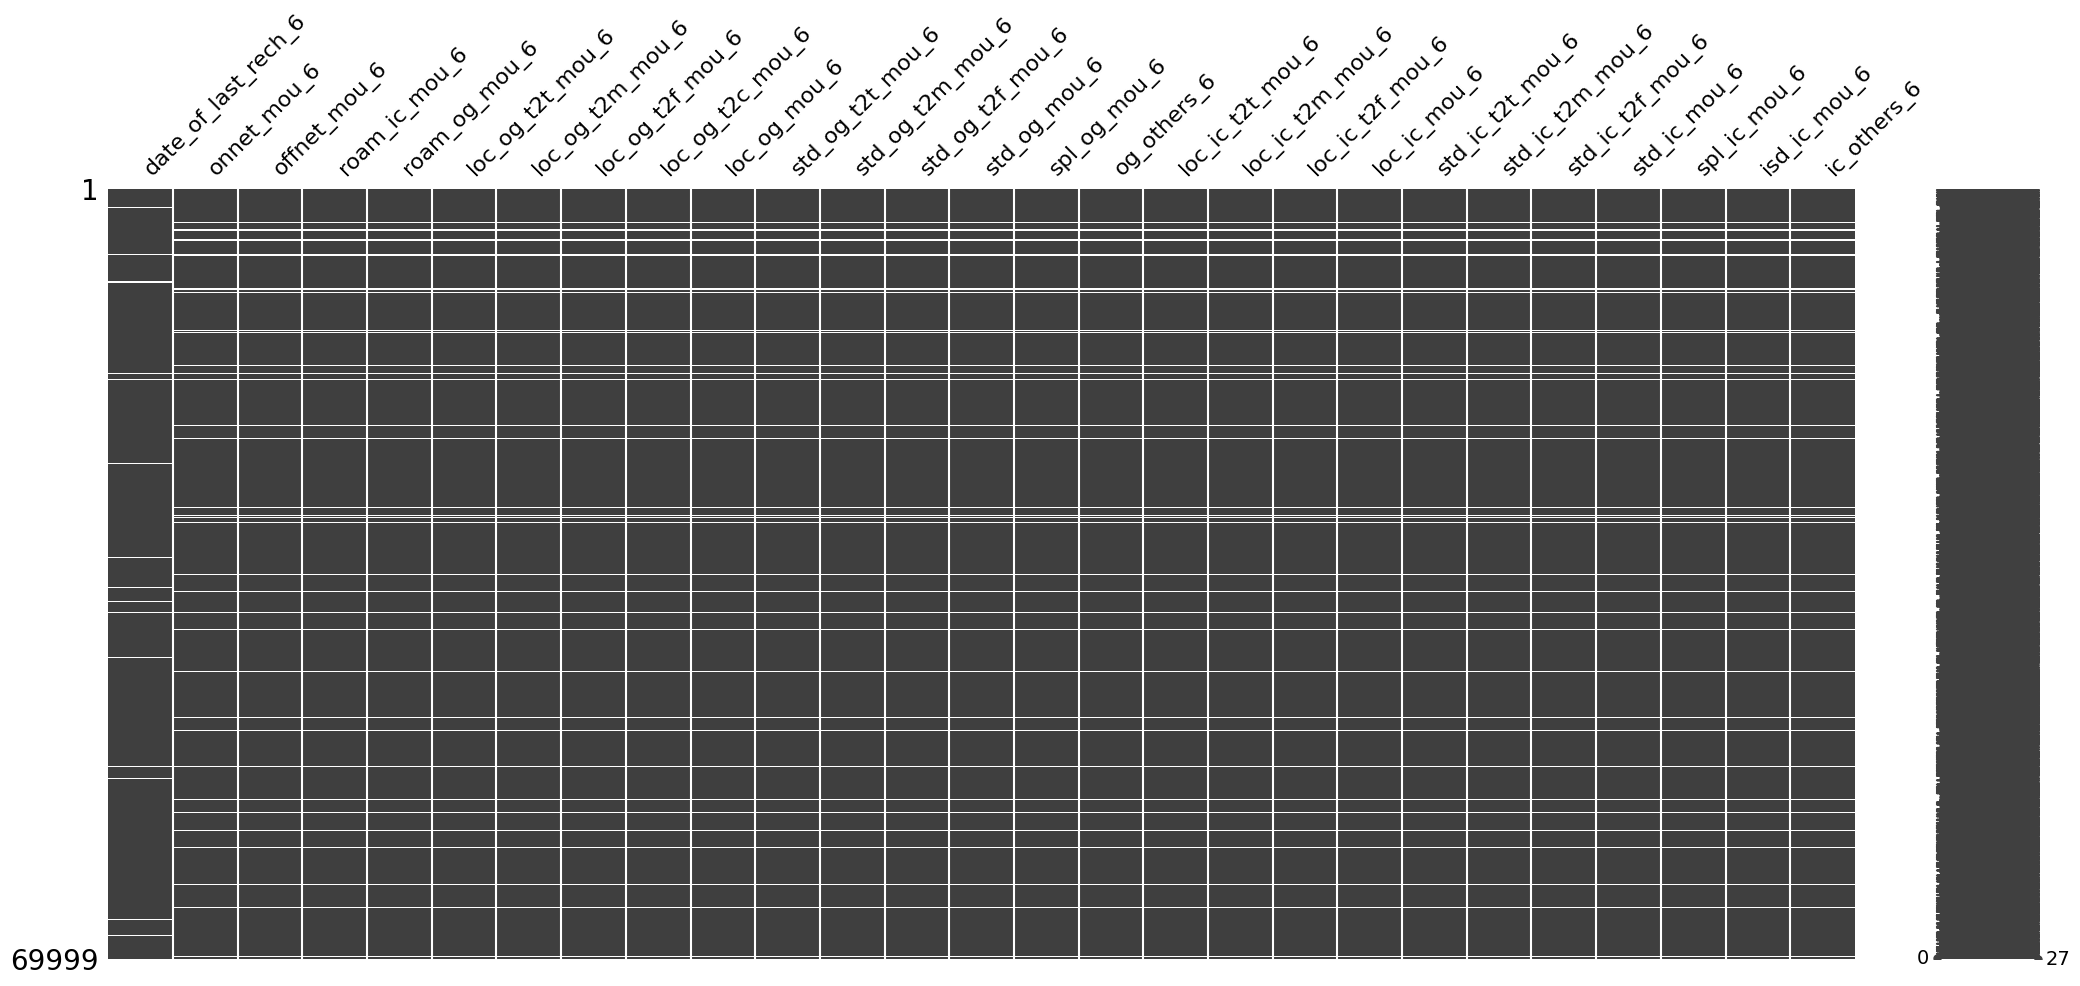

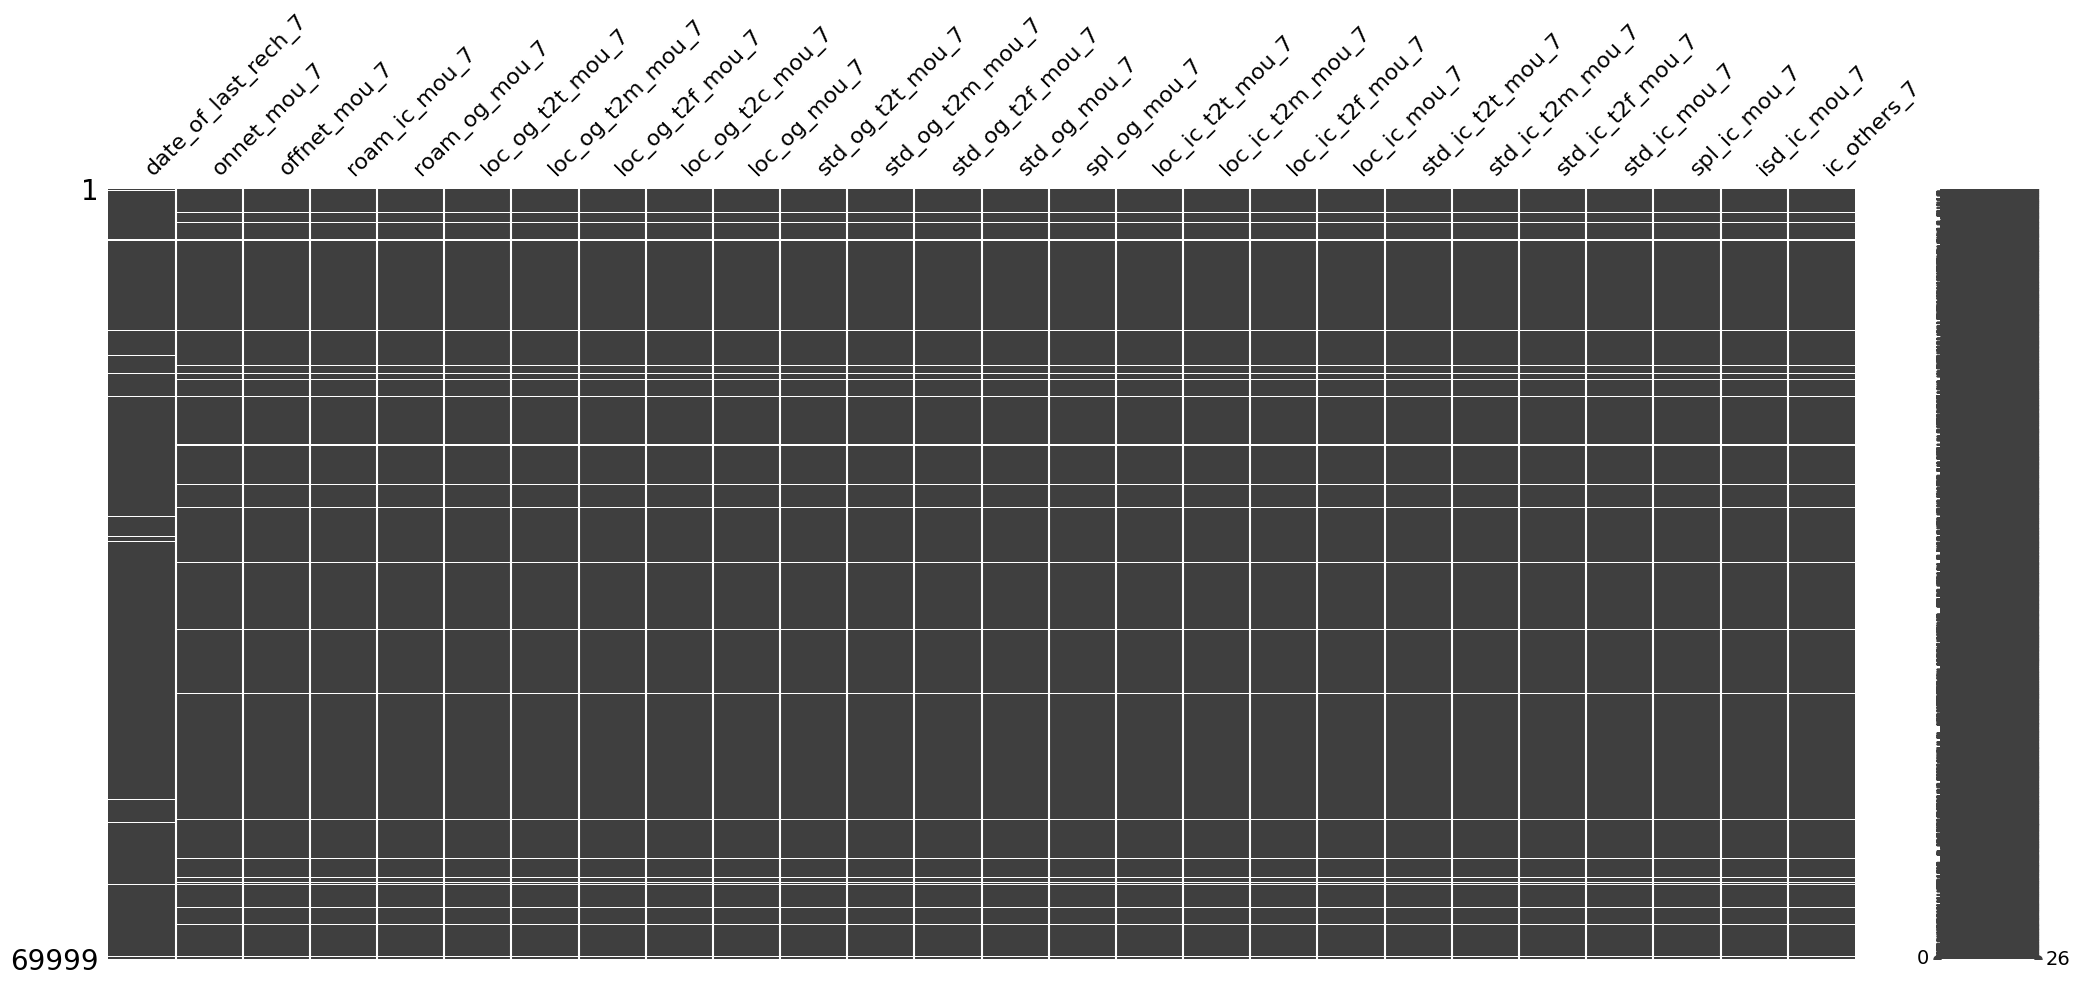

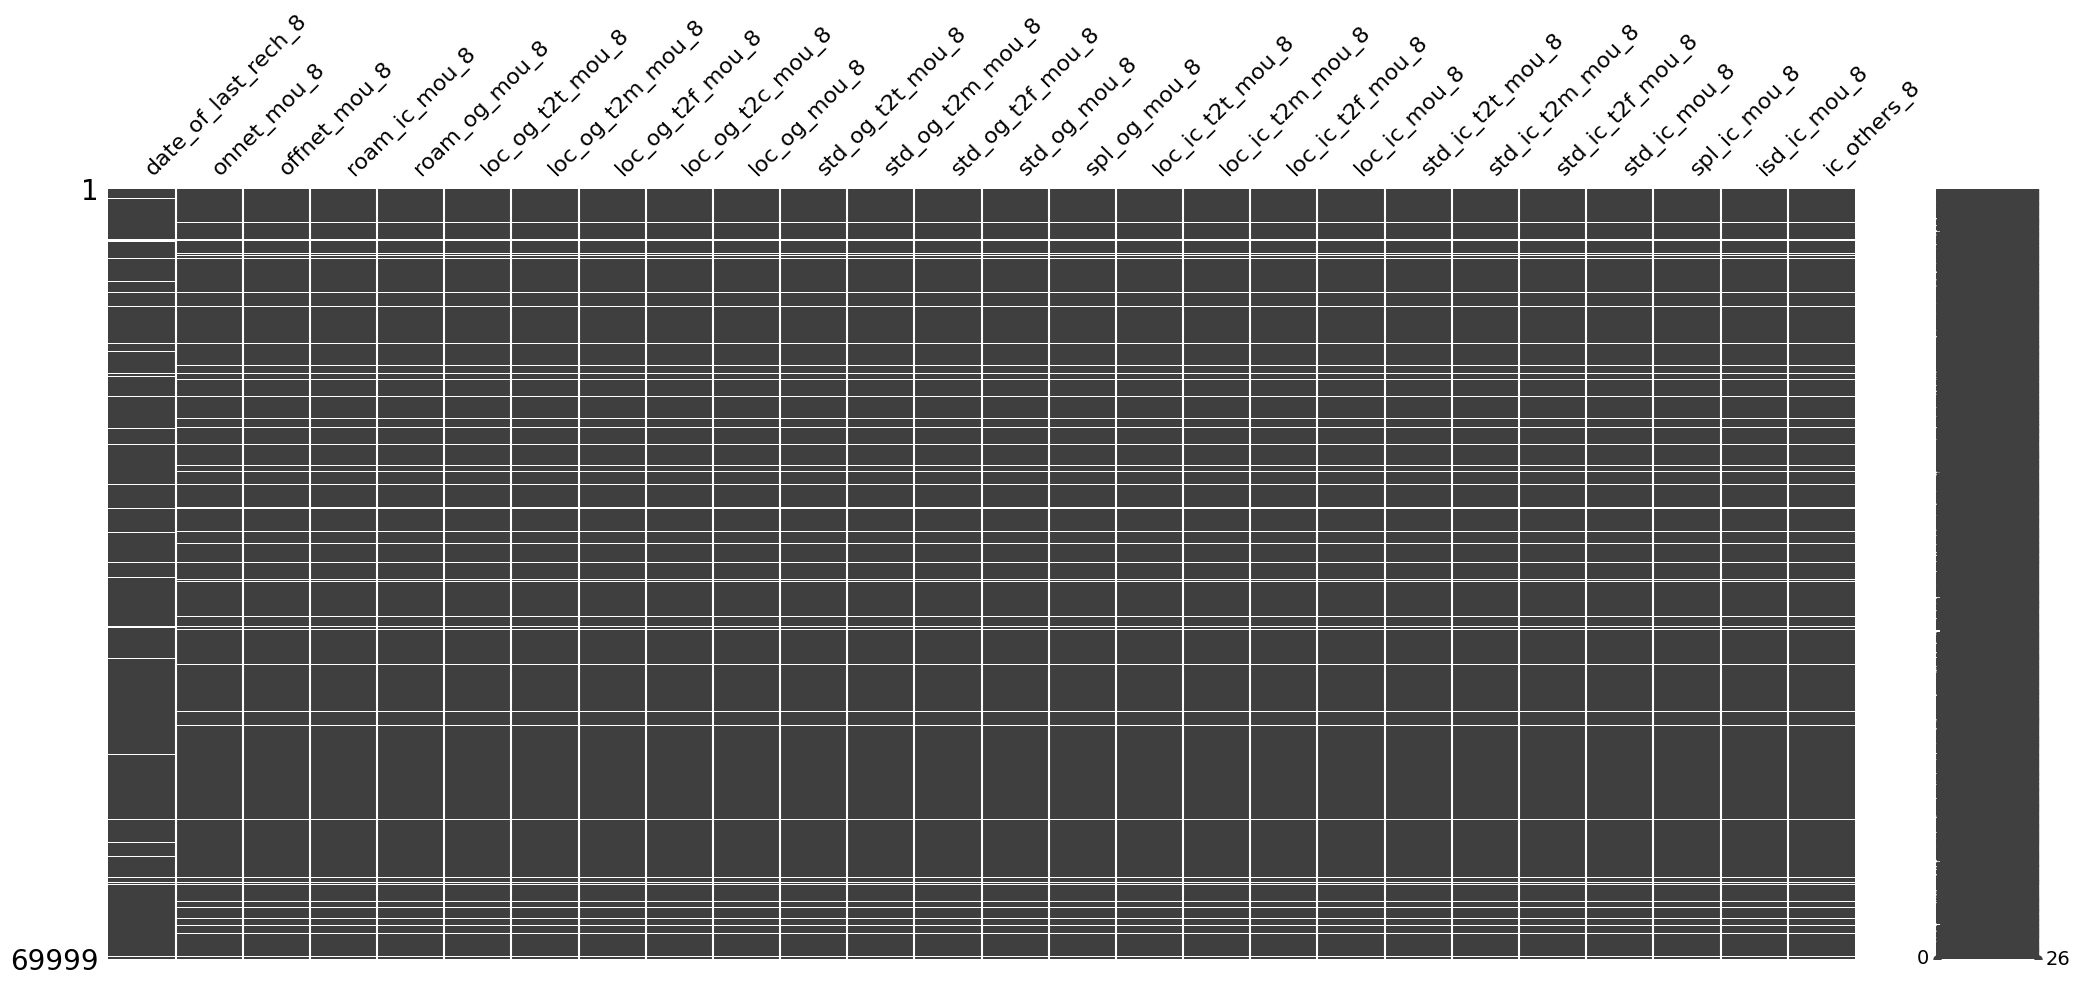

In [ ]:
# get a list of missing values' columns
null_cols = []
for i in missing_uniq_vals.index:
    null_cols.extend(missing_uniq_vals.iloc[i,1])

# Visualize the distribution of missing values for variables within the same month.

### For installing missingno library, type this command in terminal
### pip install missingno
import missingno as msno

# June of 2014
msno.matrix(data[[i for i in null_cols if re.search(r'6$',i)]])

# July of 2014
msno.matrix(data[[i for i in null_cols if re.search(r'7$',i)]])

# August of 2014
msno.matrix(data[[i for i in null_cols if re.search(r'8$',i)]])



- There are no connections between `date_last_rech` and the other variables in the month.
- The other variables' missing patterns are similar in each month.
    - All these variables represent minutes of phone call usage.     

#### Investigate date_of_last_rech missing pattern

<Axes: >

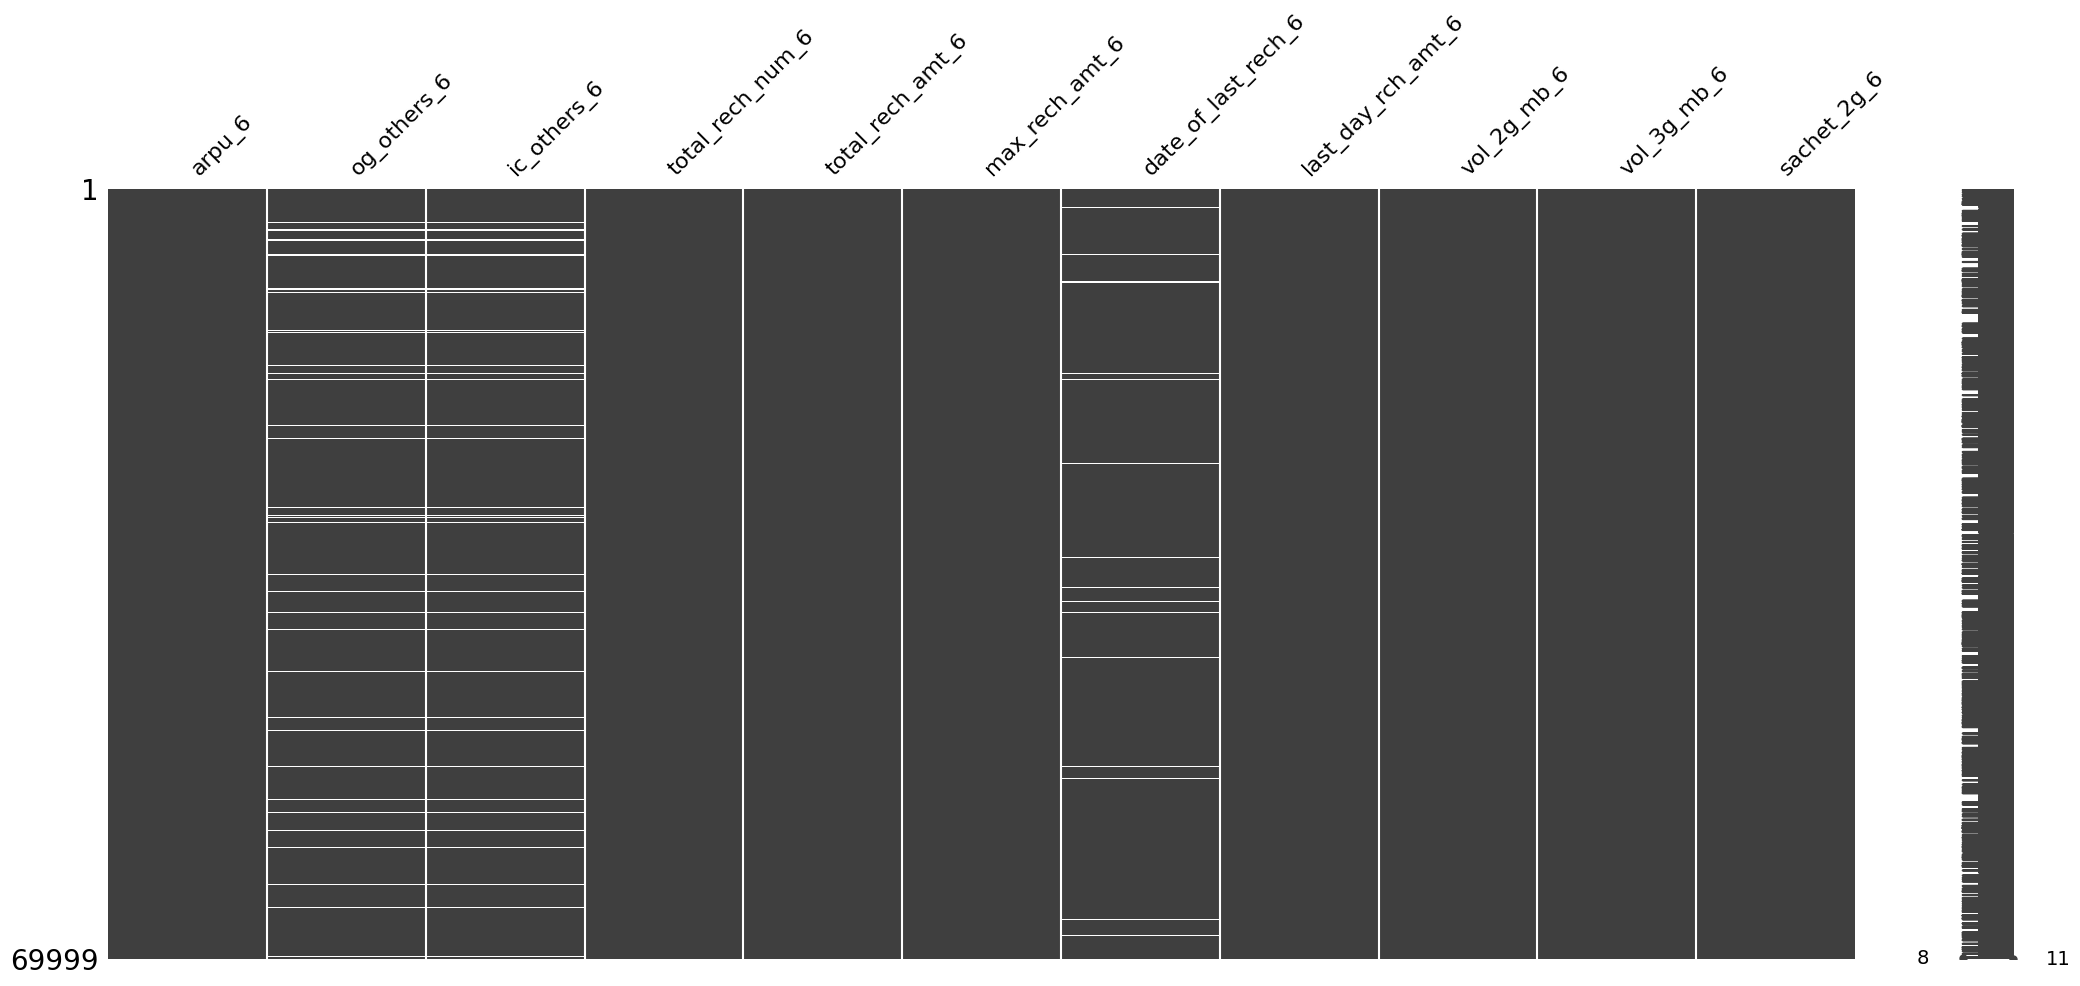

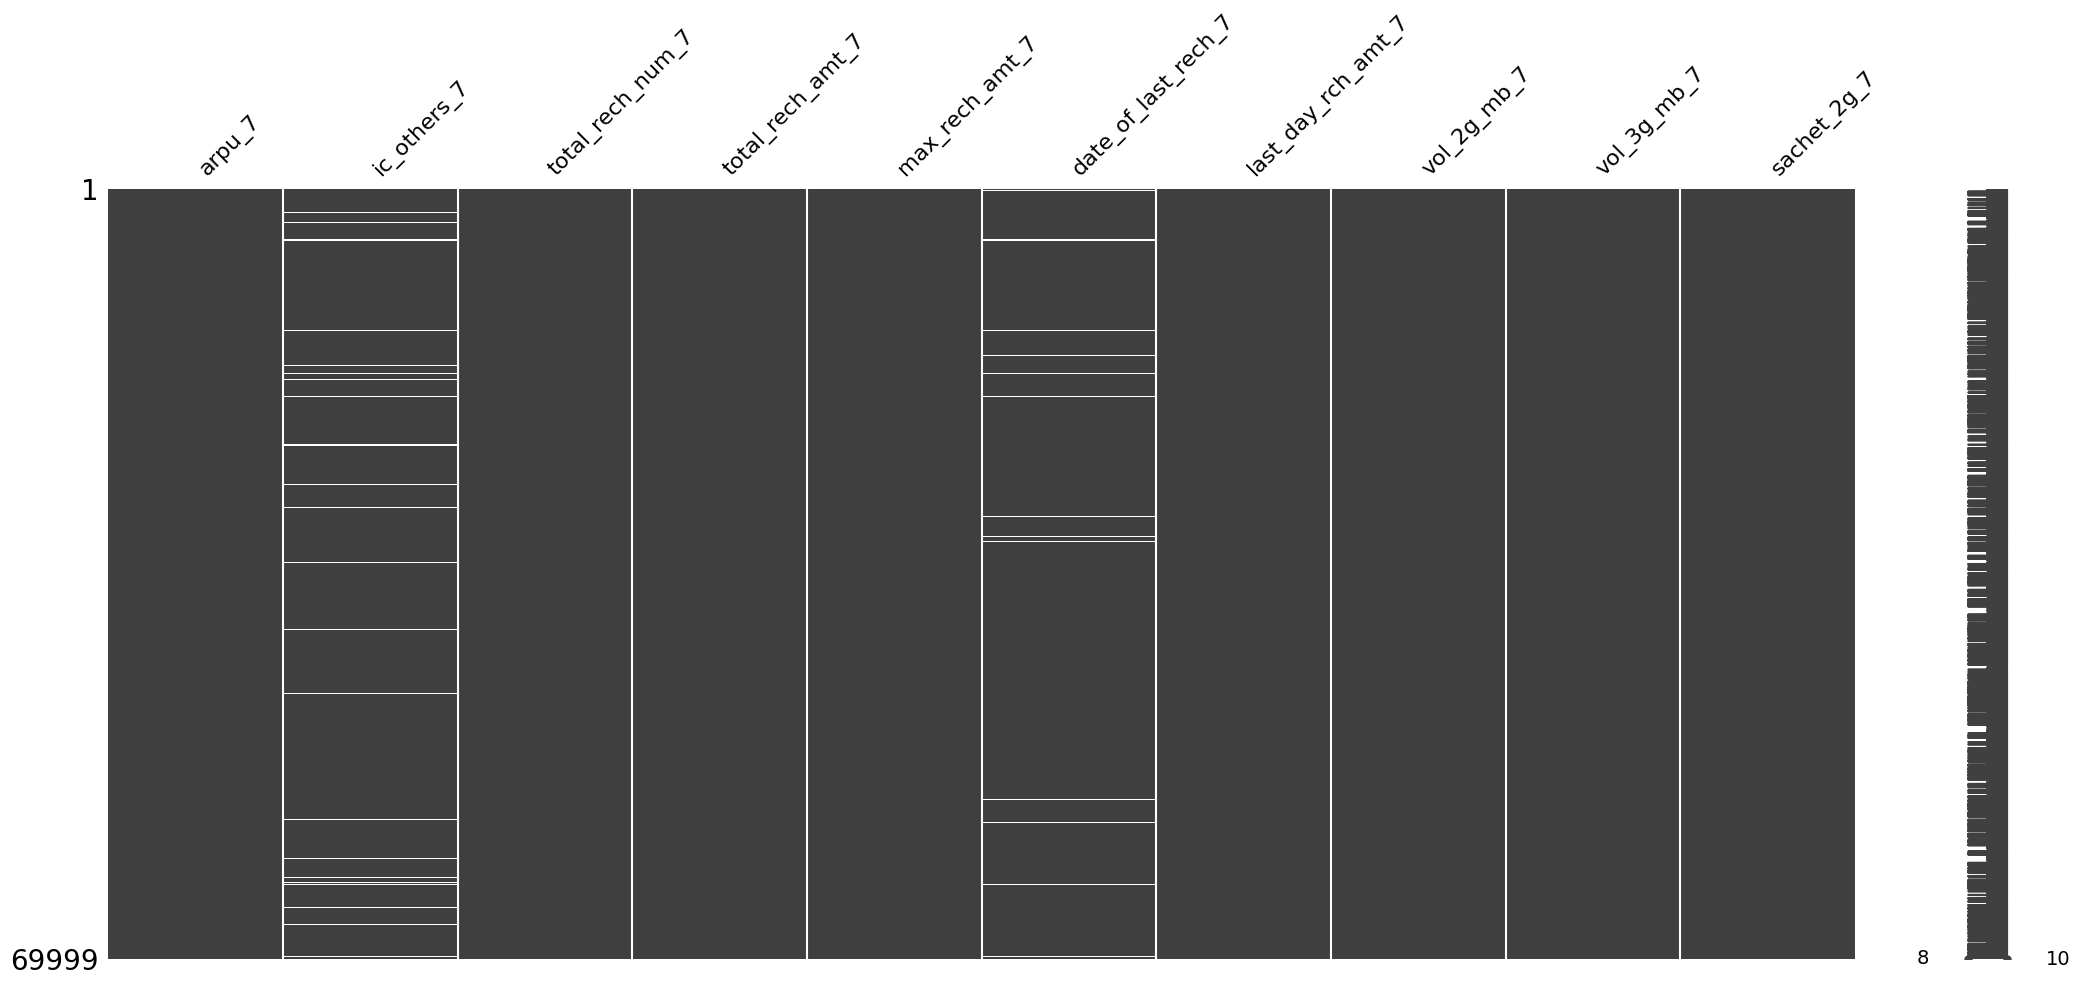

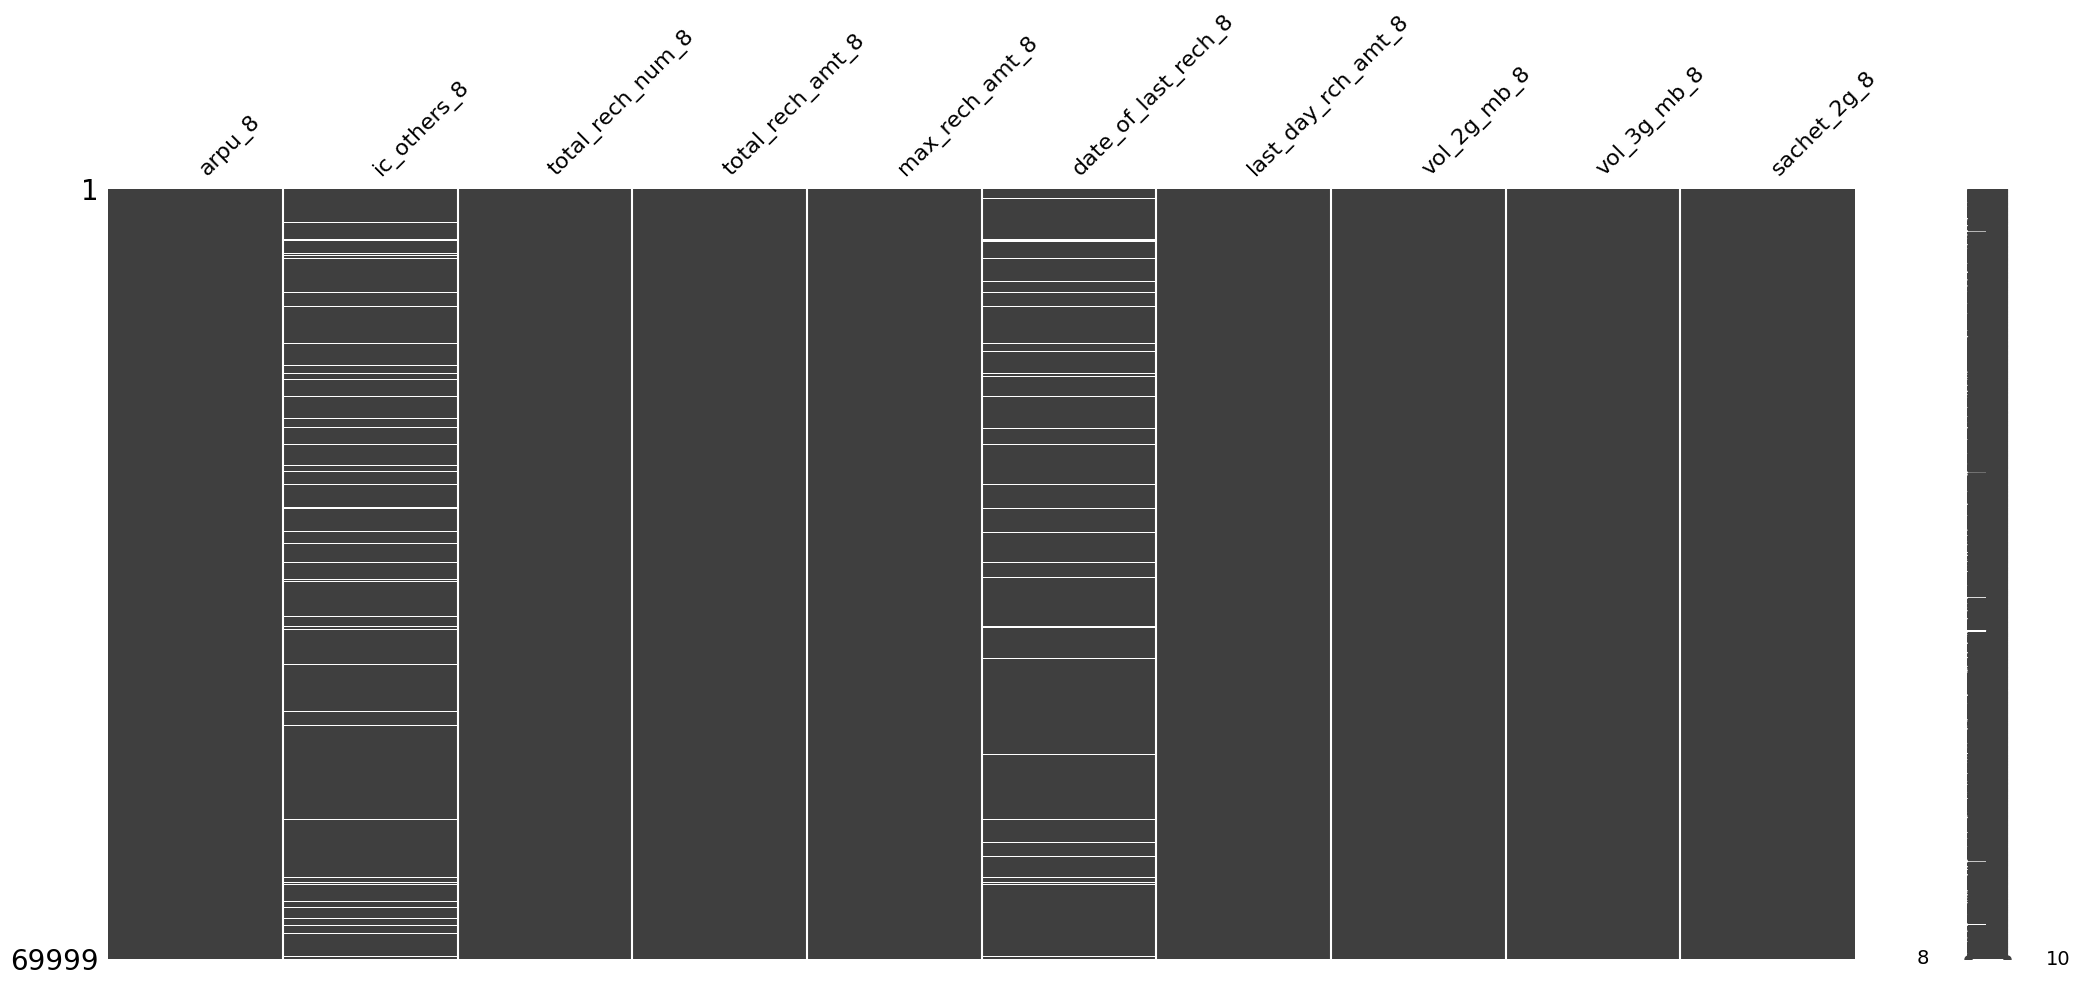

In [ ]:
# Identify the variables that are related to the date_of_last_rech variable.
msno.matrix(data[[i for i in data.columns if re.search(r'^(?!.*mou).*6$',i)]])
msno.matrix(data[[i for i in data.columns if re.search(r'^(?!.*mou).*7$',i)]])
msno.matrix(data[[i for i in data.columns if re.search(r'^(?!.*mou).*8$',i)]])

- The `date_of_last_rech` variable is related to 4 variables.
- Examinate those variables.

In [ ]:
print('Unique values of other recharge columns where values are null in the date_of_last_rech column:\n')

rech_cols_6 = [i for i in data.columns if re.search(r'^(?!.*mou).*(rech|rch).*6$',i)]
print('June 2014:')
display({i: data[data[rech_cols_6].isna().any(axis=1)][i].unique().tolist() for i in rech_cols_6})

rech_cols_7 = [i for i in data.columns if re.search(r'^(?!.*mou).*(rech|rch).*7$',i)]
print('July 2014:')
display({i: data[data[rech_cols_7].isna().any(axis=1)][i].unique().tolist() for i in rech_cols_7})

rech_cols_8 = [i for i in data.columns if re.search(r'^(?!.*mou).*(rech|rch).*8$',i)]
print('August 2014:')
display({i: data[data[rech_cols_8].isna().any(axis=1)][i].unique().tolist() for i in rech_cols_8})

Unique values of other recharge columns where values are null in the date_of_last_rech column:

June 2014:


{'total_rech_num_6': [0],
 'total_rech_amt_6': [0],
 'max_rech_amt_6': [0],
 'date_of_last_rech_6': [nan],
 'last_day_rch_amt_6': [0]}

July 2014:


{'total_rech_num_7': [0],
 'total_rech_amt_7': [0],
 'max_rech_amt_7': [0],
 'date_of_last_rech_7': [nan],
 'last_day_rch_amt_7': [0]}

August 2014:


{'total_rech_num_8': [0],
 'total_rech_amt_8': [0],
 'max_rech_amt_8': [0],
 'date_of_last_rech_8': [nan],
 'last_day_rch_amt_8': [0]}

- The unique values of those columns are all zeros.
- In other words, there were no recharges happened within those months.
- Consequently, the null values should be imputed using Random Sample Imputation
    -  In this method, samples are randomly selected from rows where any value in the recharge-related columns is equal to 0

In [ ]:
import random

# Set the seed
random.seed(1)

# get the list of all recharge related columns
rech_cols = [i for i in data.columns if re.search(r'^(?!.*mou).*(rech|rch).*',i)]

# display all date_of_last_rech columns info
print('date_of_last_rech before imputation: ')
display(more_info(data[[i for i in rech_cols if re.search(r'date_of_last_rech',i)]]))

# Obtain the dataframe where any value in the recharge related columns is equal to 0
any_equal_0_df = data[(data[rech_cols]==0).any(axis=1)][rech_cols]

# Impute missing values using random samples from the dataframe above
for i in [i for i in rech_cols if re.search(r'date_of_last_rech',i)]:
    data.loc[data[i].isna(), i] = random.choices(any_equal_0_df[i].dropna().to_list(),k=data[i].isna().sum())

print('date_of_last_rech after imputation: ')
display(more_info(data[[i for i in rech_cols if re.search(r'date_of_last_rech',i)]]))

date_of_last_rech before imputation: 


% zero values  % missing values data type  uniques
date_of_last_rech_6            NaN          1.572880    object       30
date_of_last_rech_7            NaN          1.762882    object       31
date_of_last_rech_8            NaN          3.515765    object       31

date_of_last_rech after imputation: 


% zero values  % missing values data type  uniques
date_of_last_rech_6            NaN               NaN    object       30
date_of_last_rech_7            NaN               NaN    object       31
date_of_last_rech_8            NaN               NaN    object       31

#### Investigate mou variables

<Axes: >

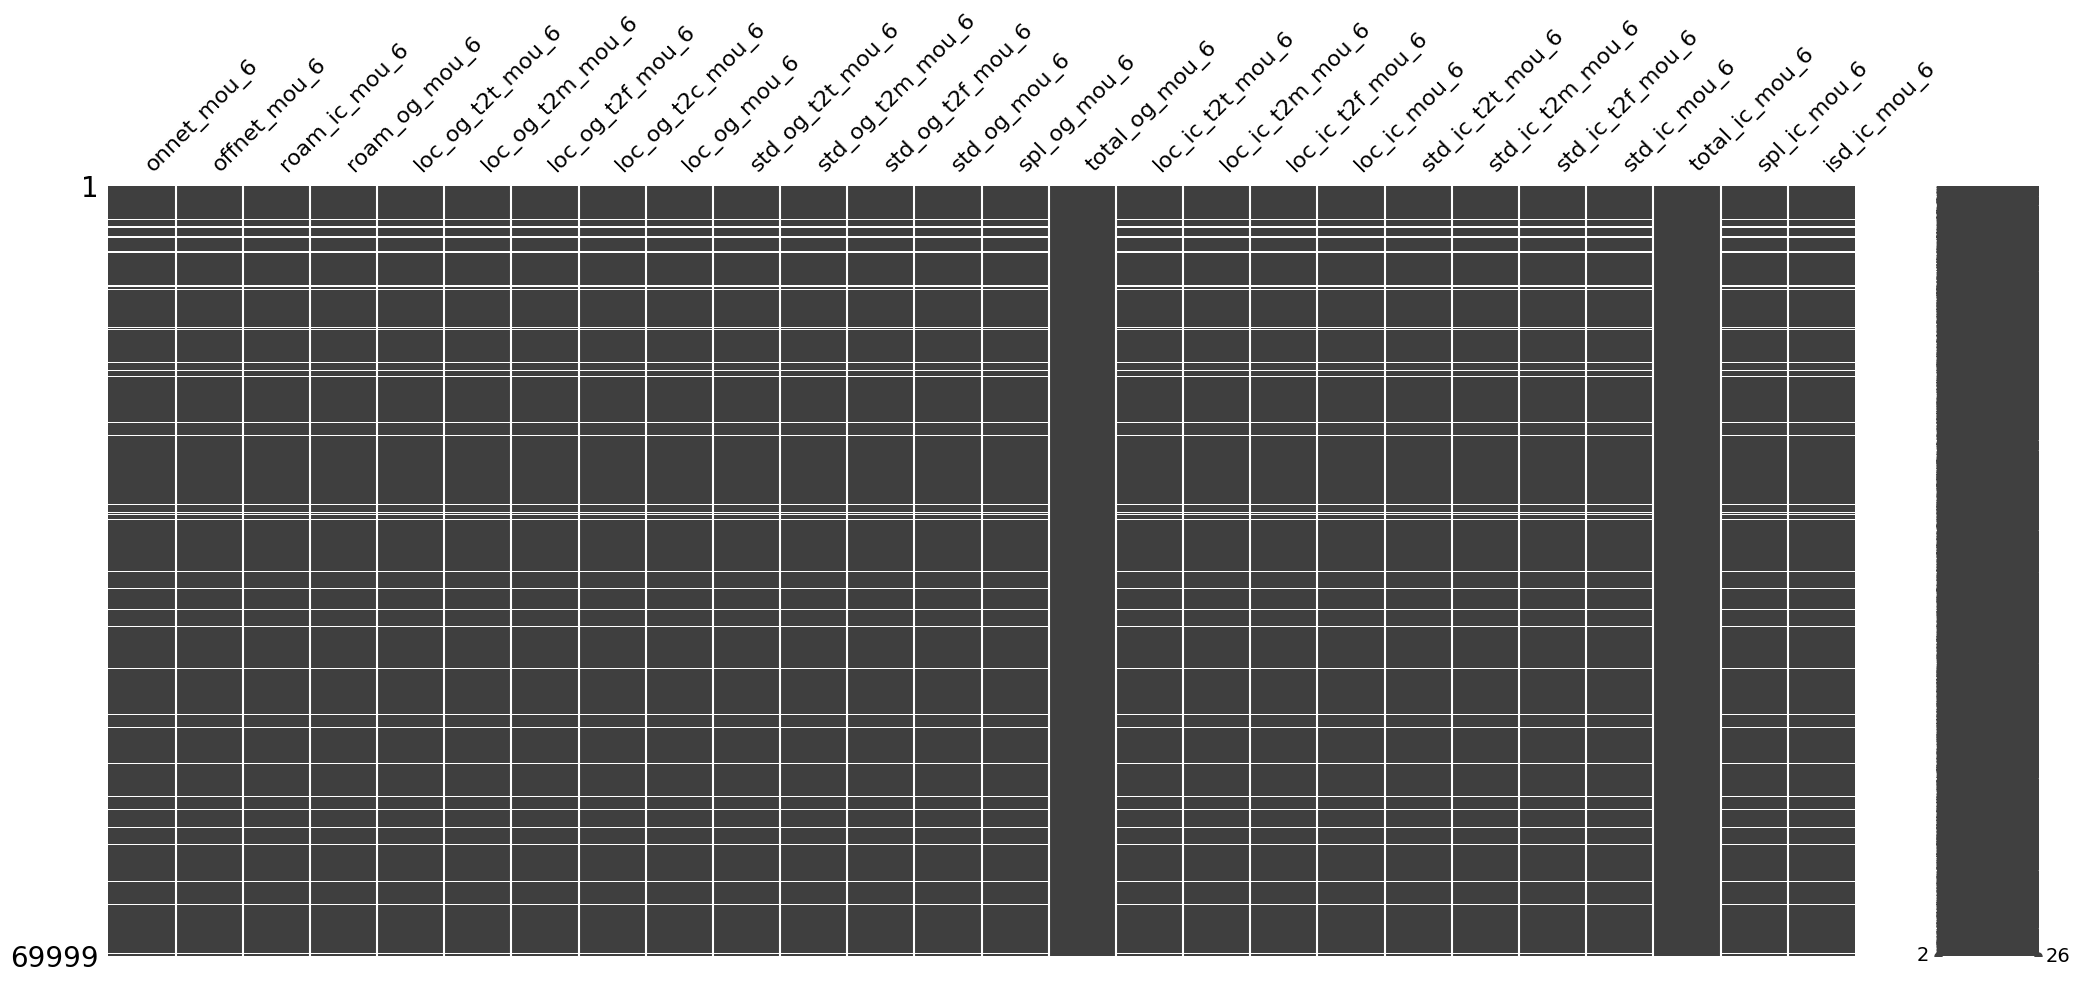

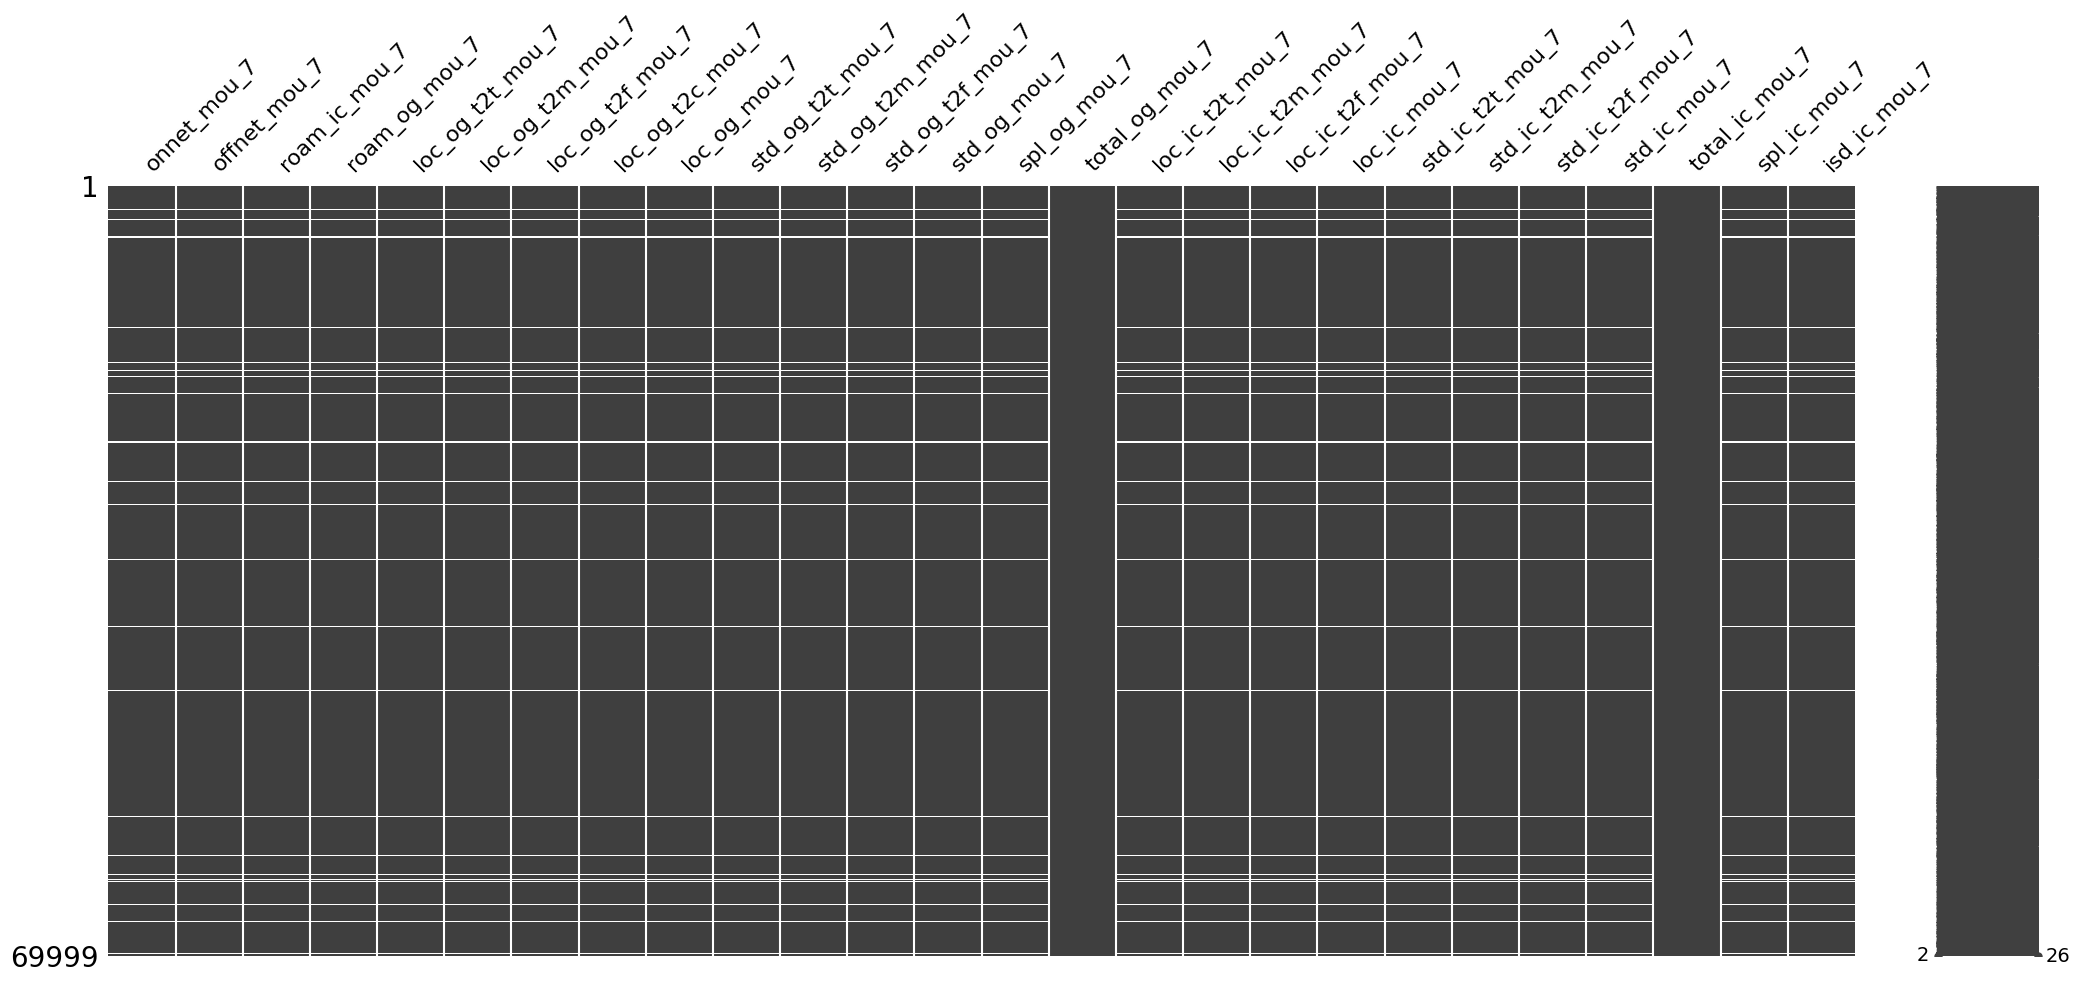

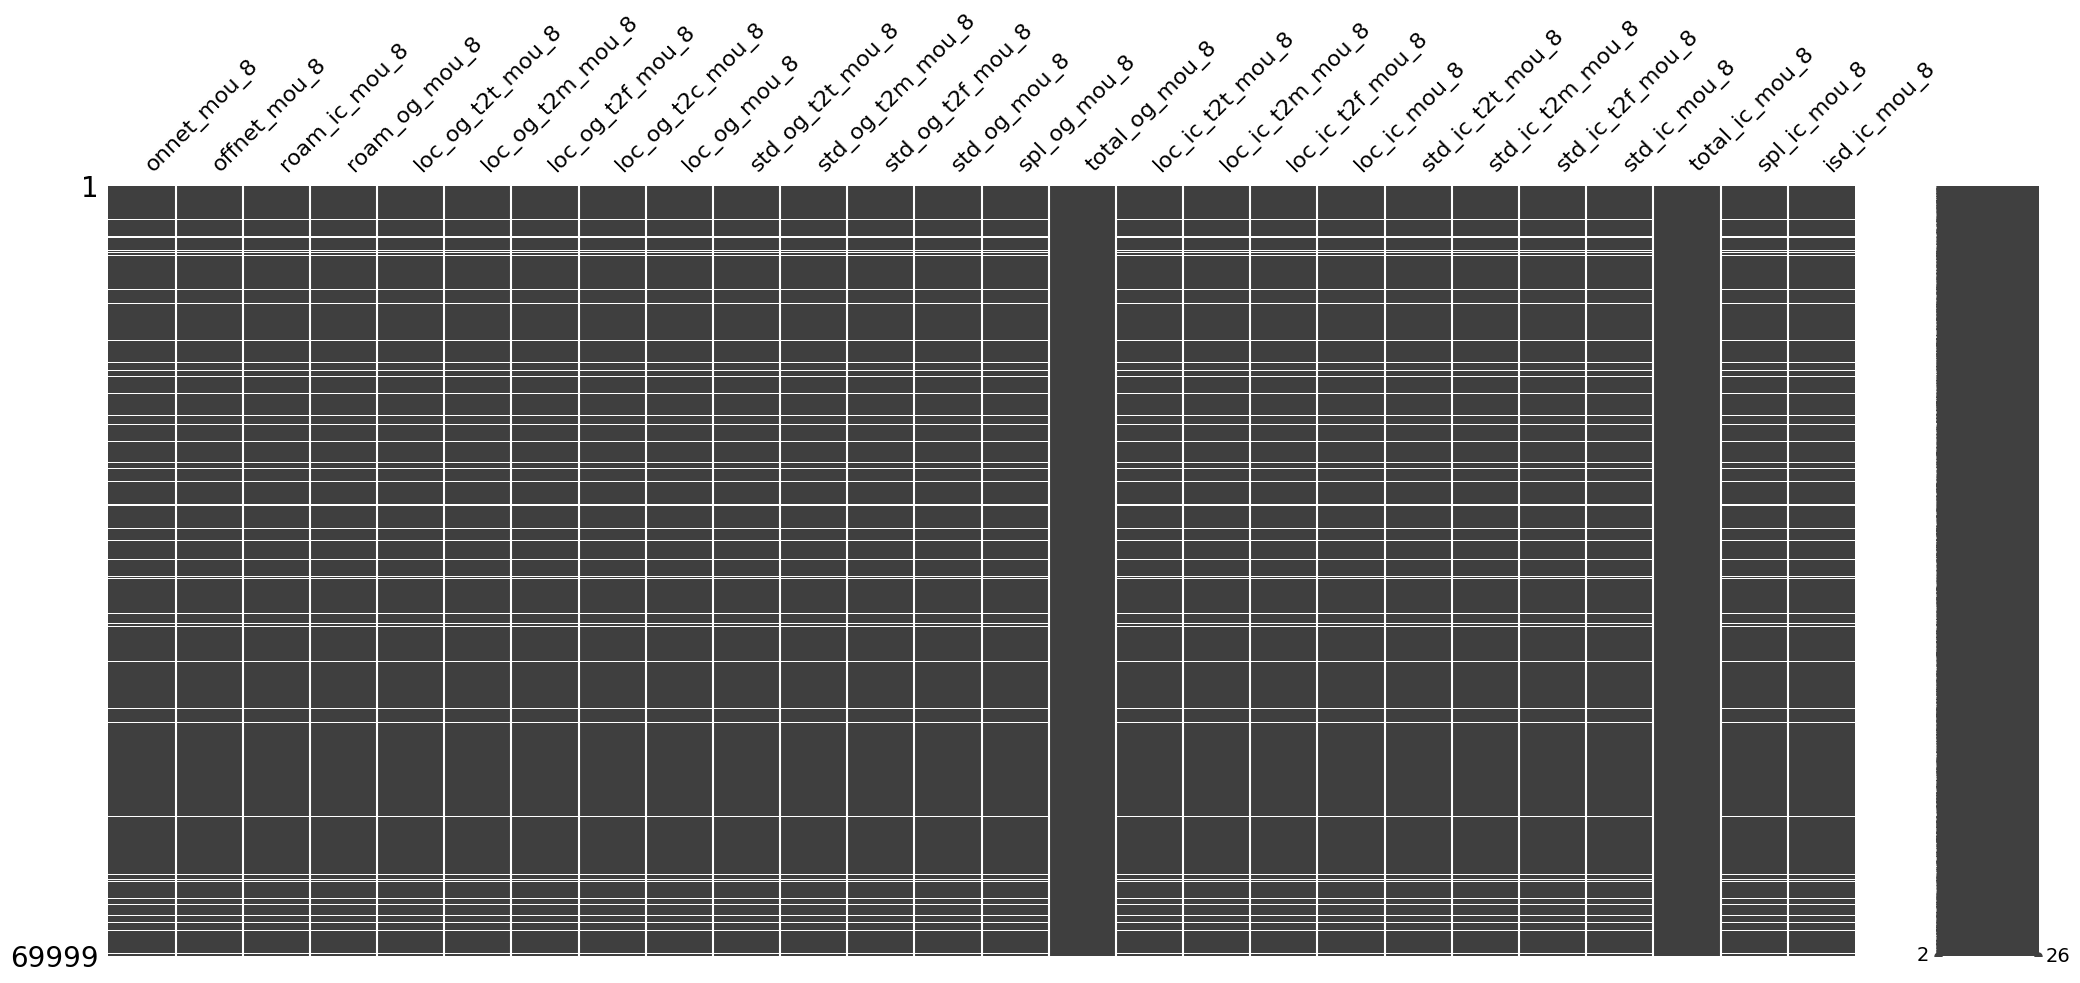

In [ ]:
# Visualize the distribution of missing values in the MOU (minutes of phone call usage) variables for each month.
msno.matrix(data[[i for i in (data.columns) if re.search(r'mou_6', i)]])
msno.matrix(data[[i for i in (data.columns) if re.search(r'mou_7', i)]])
msno.matrix(data[[i for i in (data.columns) if re.search(r'mou_8', i)]])

- Only total `mou` columns are free of nulls
- investigate those columns

In [ ]:
print('Unique values of the "total" columns where values are null in other "mou" columns')

uniq_mising_total_6 = [i for i in (data.columns) if re.search(r'^total.*.mou_6$|onnet_mou_6', i)]
display({i: data[data[uniq_mising_total_6].isna().any(axis=1)][i].unique().tolist() for i in uniq_mising_total_6})

uniq_mising_total_7 = [i for i in (data.columns) if re.search(r'^total.*.mou_7$|onnet_mou_7', i)]
display({i: data[data[uniq_mising_total_7].isna().any(axis=1)][i].unique().tolist() for i in uniq_mising_total_7})

uniq_mising_total_8 = [i for i in (data.columns) if re.search(r'^total.*.mou_8$|onnet_mou_8', i)]
display({i: data[data[uniq_mising_total_8].isna().any(axis=1)][i].unique().tolist() for i in uniq_mising_total_8})


Unique values of the "total" columns where values are null in other "mou" columns


{'onnet_mou_6': [nan], 'total_og_mou_6': [0.0], 'total_ic_mou_6': [0.0]}

{'onnet_mou_7': [nan], 'total_og_mou_7': [0.0], 'total_ic_mou_7': [0.0]}

{'onnet_mou_8': [nan], 'total_og_mou_8': [0.0], 'total_ic_mou_8': [0.0]}

- The unique values of those columns are all zeros.
- In other words, there were no minutes of usage in those records.
- The null values should be imputed as zero.

Text(0.5, 1.0, 'After imputation')

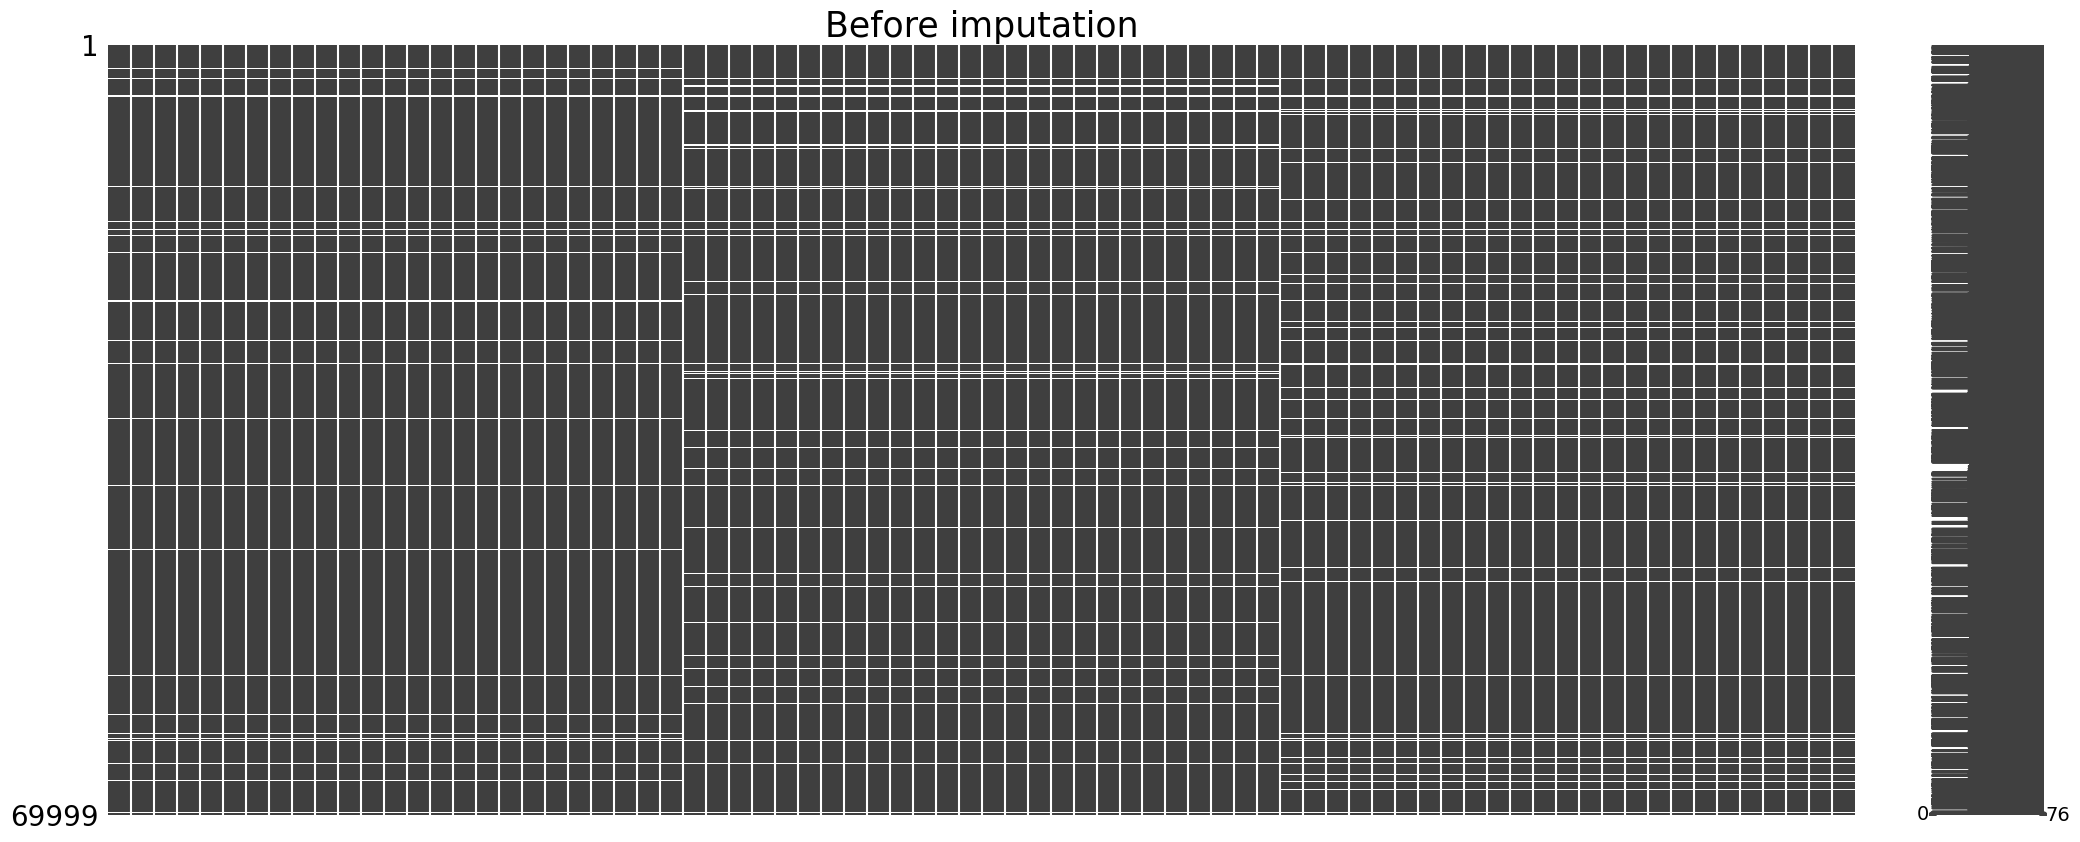

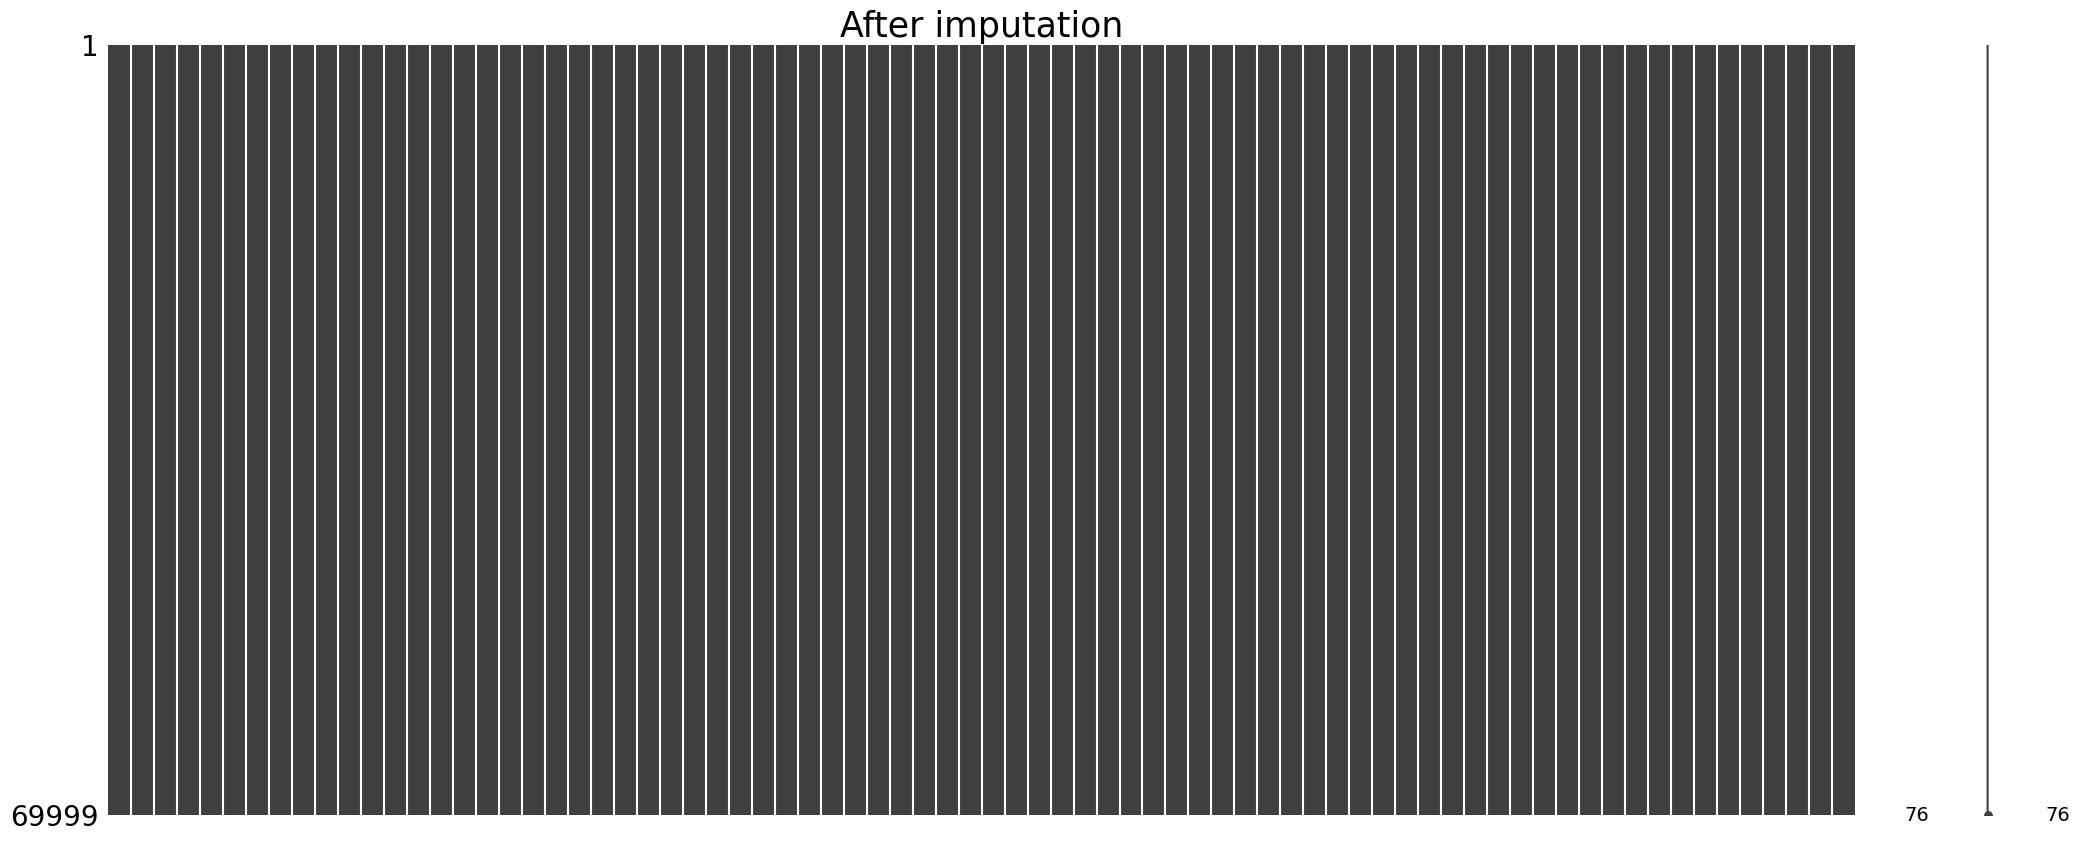

In [ ]:
# remaining columns that contain null values
null_cols = [i for i in null_cols if i not in rech_cols]

# check if mull values exists
msno.matrix(data[null_cols])
plt.title('Before imputation', fontsize=25)


# fillna with 0
[data[i].fillna(0, inplace=True) for i in null_cols]

# check if 0 imputation is completed
msno.matrix(data[null_cols])
plt.title('After imputation', fontsize=25)

In [ ]:
# check if there any null values in the dataset
print('Null values in the dataset: ', data.isna().any().any())

Null values in the dataset:  False


## Feature Engineering

### Analyze object data type

In [ ]:
# preview all data types
print('Preview all data types: ')
data_info = more_info(data)
display(data_info.groupby(by='data type').count())

# preview object data type
print('Preview object data info: ')
display(data_info[data_info['data type'] == 'object'])

# preview unique object values
print('Preview unique object data values: ')
object_cols = list(data_info[data_info['data type'] == 'object'].index)
object_data = data [object_cols]
# code gotten from https://stackoverflow.com/questions/47933213/list-unique-values-in-a-pandas-dataframe
object_uniq_vals = pd.DataFrame(pd.Series({i: object_data[i].unique() for i in object_data})).rename(columns={0:'unique values'})
# object_uniq_vals = pd.DataFrame({i: object_data[i].unique() for i in object_data.index}).rename(columns={0:'unique values'})
display(object_uniq_vals.style)

# preview object data table
print('Preview object data table: ')
display(data[data_info[data_info['data type'] == 'object'].index].head())



Preview all data types: 


% zero values  % missing values  uniques
data type                                          
int64                 16                 0       17
float64               94                 0       94
object                 0                 0        3

Preview object data info: 


% zero values  % missing values data type  uniques
date_of_last_rech_6            NaN               NaN    object       30
date_of_last_rech_7            NaN               NaN    object       31
date_of_last_rech_8            NaN               NaN    object       31

Preview unique object data values: 


Preview object data table: 


date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0           6/22/2014           7/10/2014           8/24/2014
1           6/12/2014           7/10/2014           8/26/2014
2           6/11/2014           7/22/2014           8/24/2014
3           6/15/2014           7/21/2014           8/25/2014
4           6/25/2014           7/26/2014           8/30/2014

<i> All object data are date data from June, July, and August of 2014

### Feature Generation

In [ ]:
# the original unique object data values
print('the original unique object data values: ')
[print(col, data[col].unique()) for col in object_cols]

# change object columns to datetime
data[object_cols] = data[object_cols].apply(pd.to_datetime)

# initialize date lists
date_cols = []

# define `day_of_last_rech` variables to replace date_of_last_rech variable
for i in object_cols:
    # date_cols.extend([i, i.replace('date', 'day')])#, i.replace('date_of', 'days_from_baseline')])
    date_cols.append(i.replace('date', 'day'))#, i.replace('date_of', 'days_from_baseline')])
    data[i.replace('date', 'day')] = data[i].dt.day
    data.drop(columns=i, inplace=True)

# Preview day_of_last_rech data tabl
print('Preview day_of_last_rech data table: ')
display(data[date_cols].head())

the original unique object data values: 
date_of_last_rech_6 ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7 ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014' '7/12/2014'
 '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014' '7/8/2014'
 '7/14/2014' '7/11/2014' '7/5/2014' '7/4/2014' '7/6/2014' '7/2/2014'
 '7/3/2014']
date_of_last_rech_8 ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2014' '8/16/2014' '8/21/2014' '8/22/2014' '8/23/2014'
 '8/15/2014' '8/31/2014' '8

day_of_last_rech_6  day_of_last_rech_7  day_of_last_rech_8
0                  22                  10                  24
1                  12                  10                  26
2                  11                  22                  24
3                  15                  21                  25
4                  25                  26                  30

# Data Spliting

#### split data into train & test set

In [ ]:
# Identify the response and predictor variables separately
X = data.drop(columns = ['churn_probability'])
y = data['churn_probability']

X.shape, y.shape

((69999, 113), (69999,))

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 113), (14000, 113), (55999,), (14000,))

# EDA

## Univariate Analysis

### Predictor variables

In [ ]:
# define custom univariate heatmap function
from matplotlib.colors import ListedColormap

def univariate_heatmap(dt, pct, drop_cols):

    # create dataframe to be used for heatmap
    heatmap_df = dt.describe(include='all', percentiles=pct).transpose().drop(columns=drop_cols)
    heatmap_df_normalized = pd.DataFrame(columns=heatmap_df.columns)
    heatmap_df_normalized = heatmap_df.div(heatmap_df.max(axis=1), axis=0)*100

    fig, ax = plt.subplots(figsize=(15, 22))

    # base heatmap with annotation set to True
        # code gotten from https://stackoverflow.com/questions/33779748/set-max-value-for-color-bar-on-seaborn-heatmap
    sns.heatmap(heatmap_df, annot=True, fmt="g", annot_kws={"color":'white'}, cmap=ListedColormap(['white']), cbar=False, ax=ax)

    # overlaying heatmap with annotation set to false
    sns.heatmap(heatmap_df_normalized, annot=False, cmap='crest', ax=ax,  cbar_kws={'format': '%.0f%%'})

    # set tick labels on top
    ax.tick_params(top=True, labeltop=True, labelrotation=0)
    plt.tight_layout()



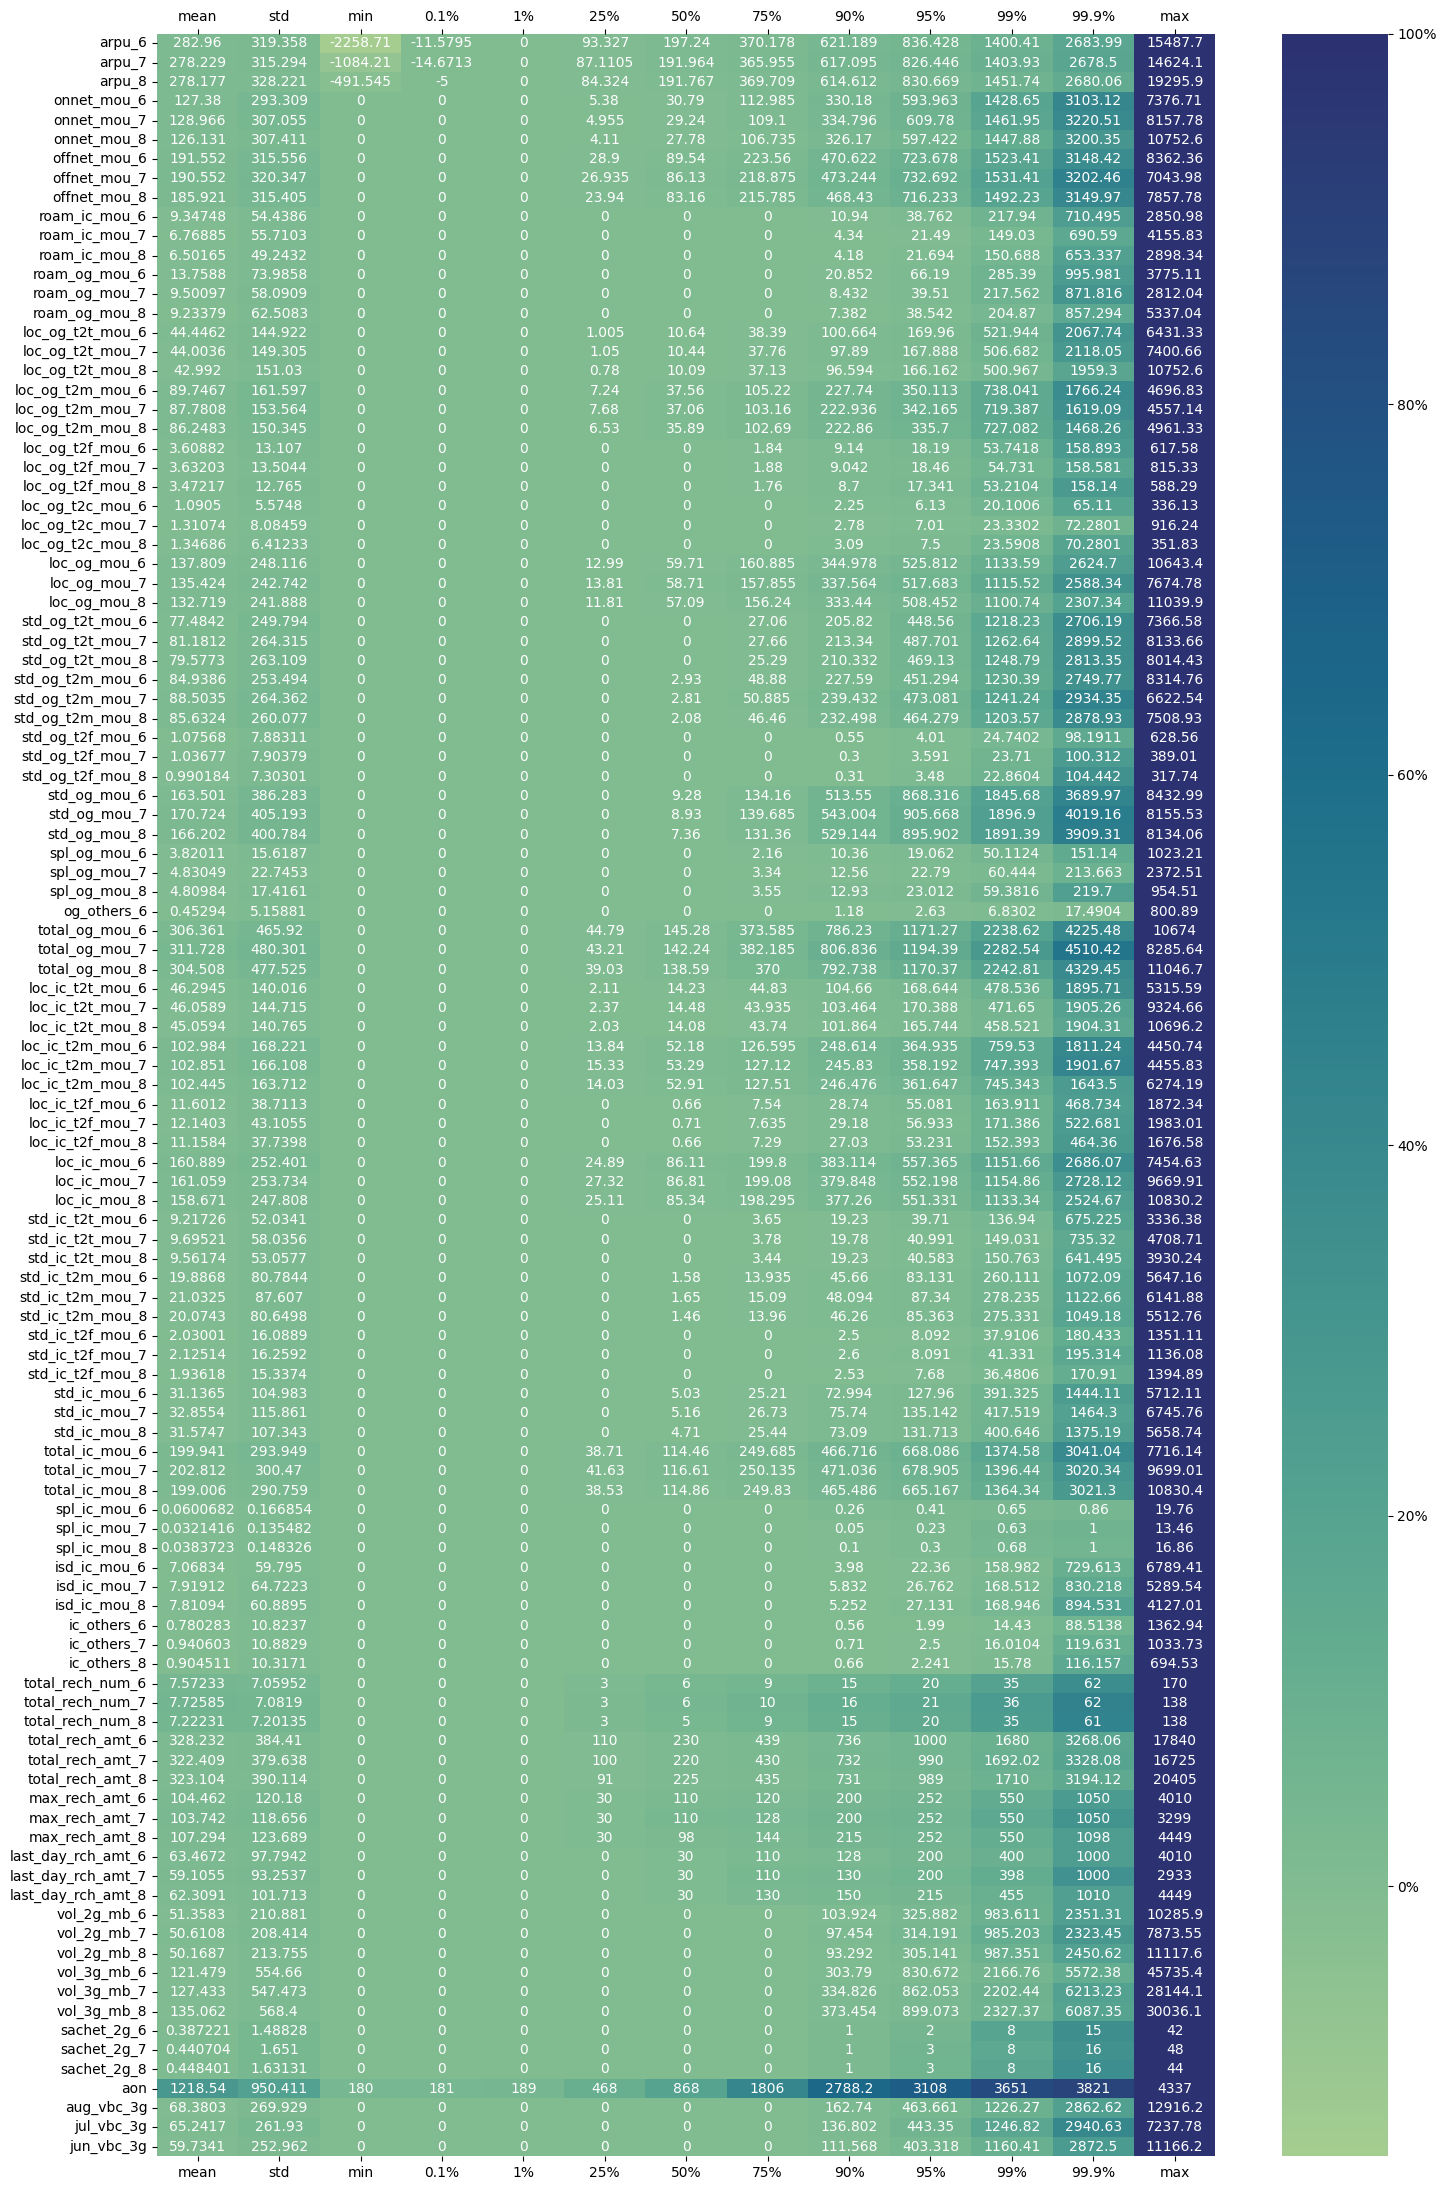

In [ ]:
# display the univariate heatmap
univariate_heatmap(X_train.loc[:,~X_train.columns.isin(date_cols)], [.001, .01, .25, .75, .9, .95, .99, .999], ['count'])

### Handling Outliers

Capping Outliers above the 99th percentile and below the 1st percentile. (except for `aon`)

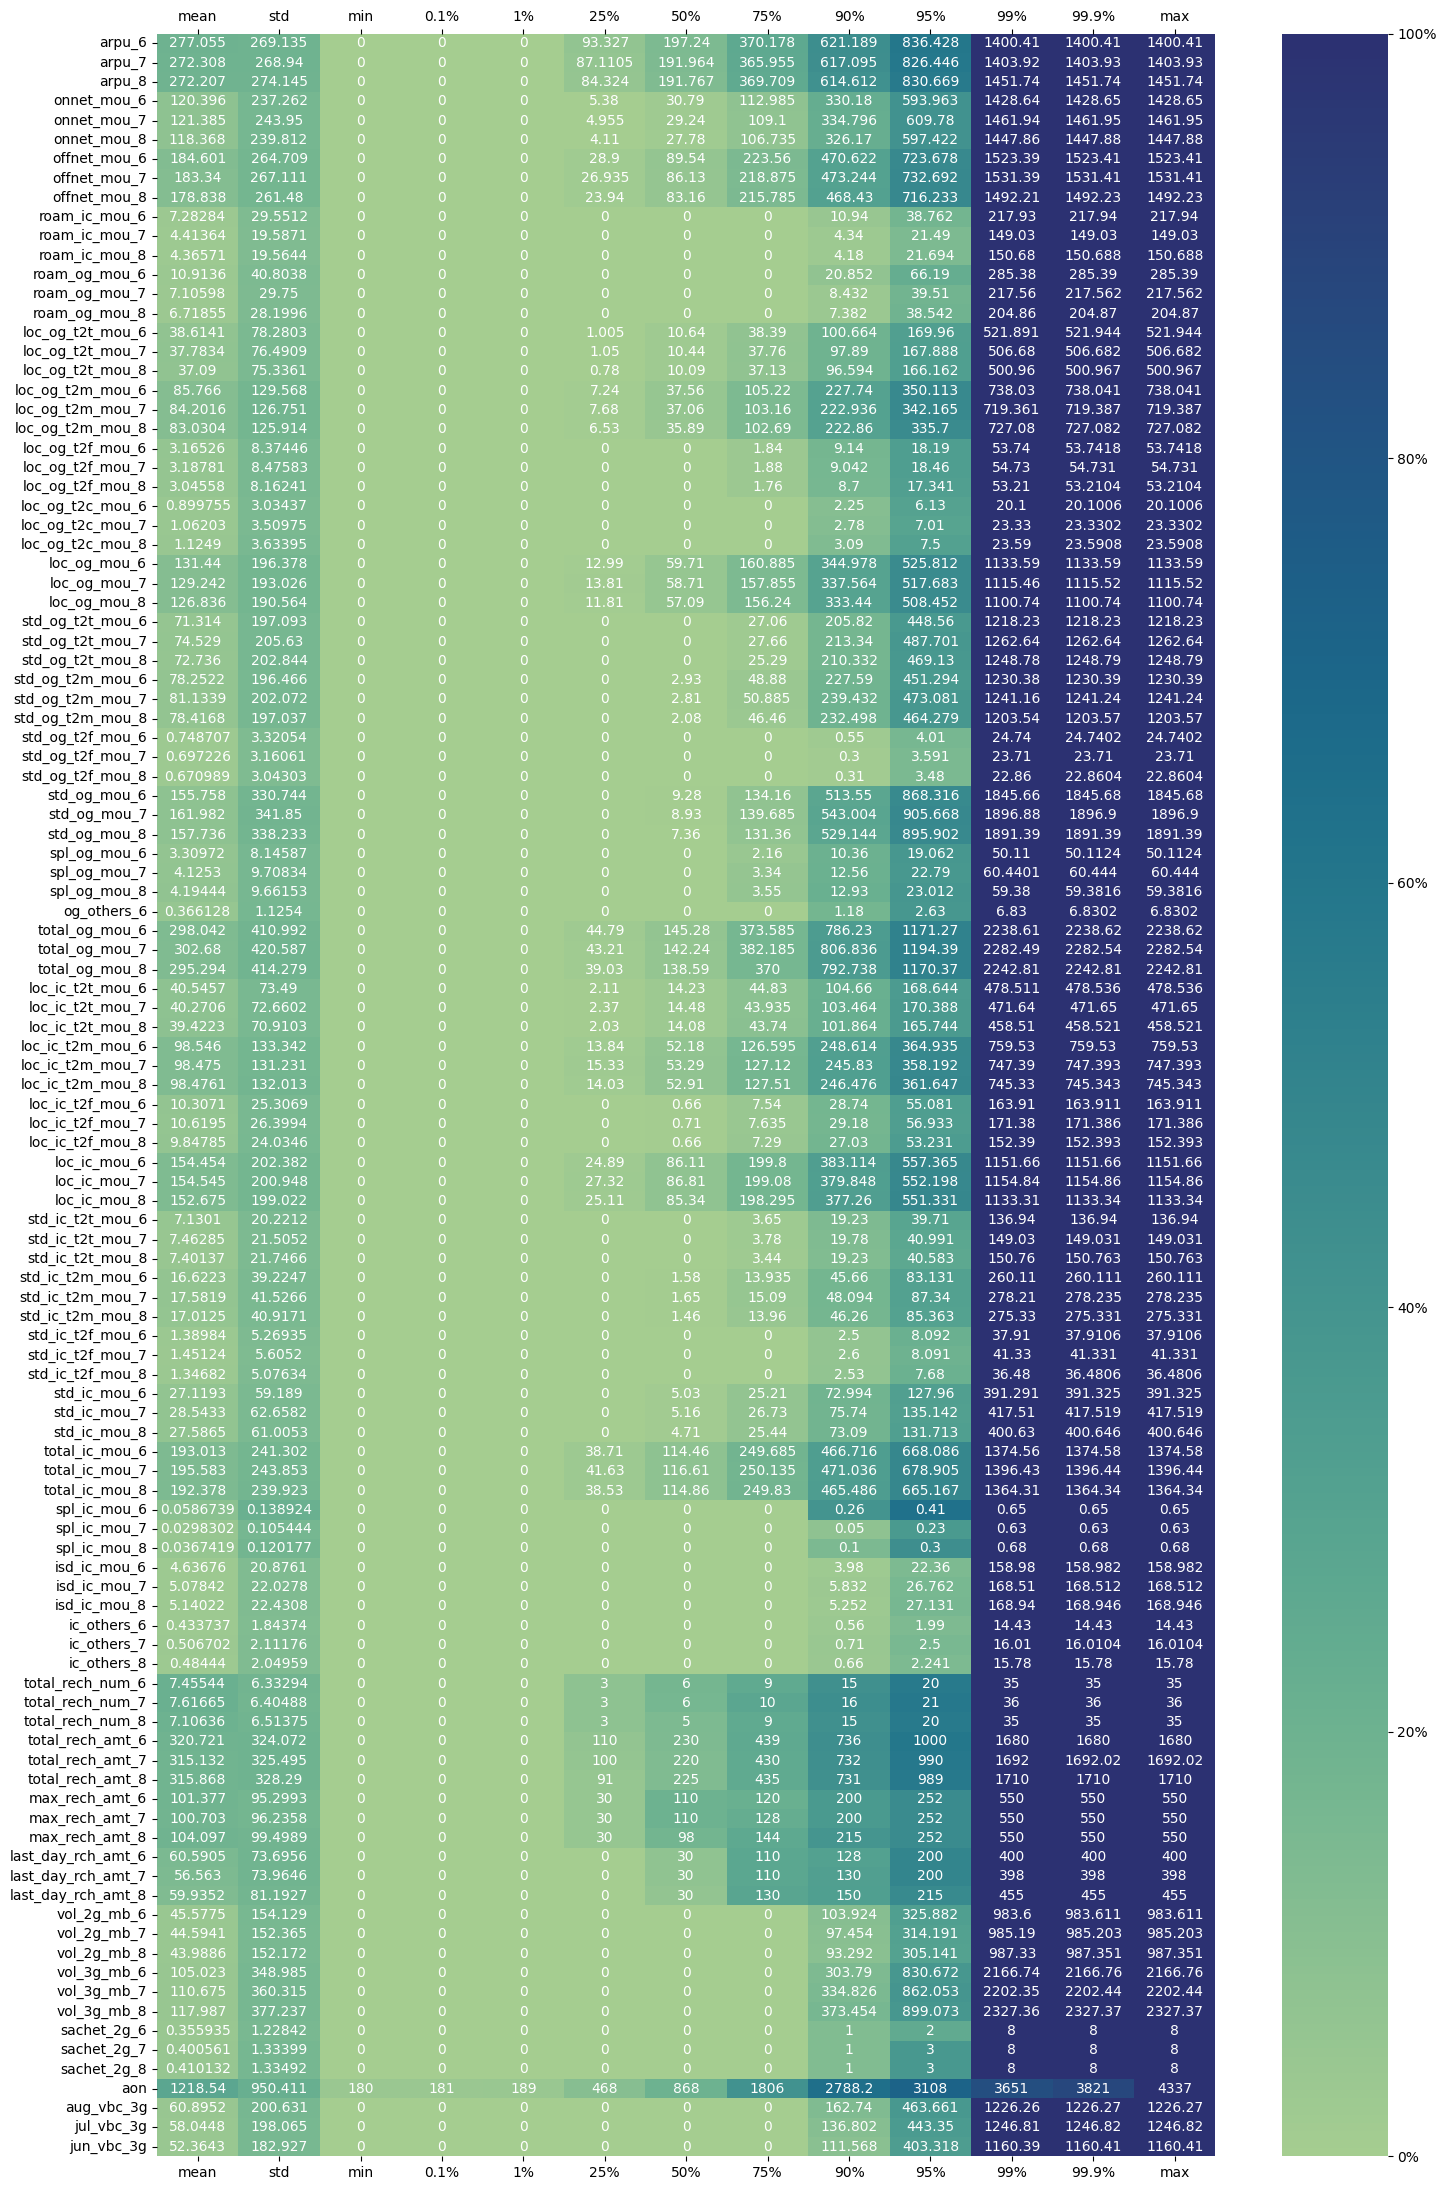

In [ ]:
# cap the outliers
capped_down_outliers, capped_up_outliers ={}, {}
for i in X_train.columns[~X_train.columns.isin(date_cols + ['aon'])]:
    capped_down_outliers[i] = X_train[i].quantile(0.01)
    capped_up_outliers[i] = X_train[i].quantile(0.99)
    X_train[i] = X_train[i].clip(X_train[i].quantile(0.01), X_train[i].quantile(0.99))
# display the univariate heatmap after capping
univariate_heatmap(X_train.loc[:,~X_train.columns.isin(date_cols)], [.001, .01, .25, .75, .9, .95, .99, .999], ['count'])

### Response variable

<Axes: xlabel='churn_probability', ylabel='Count'>

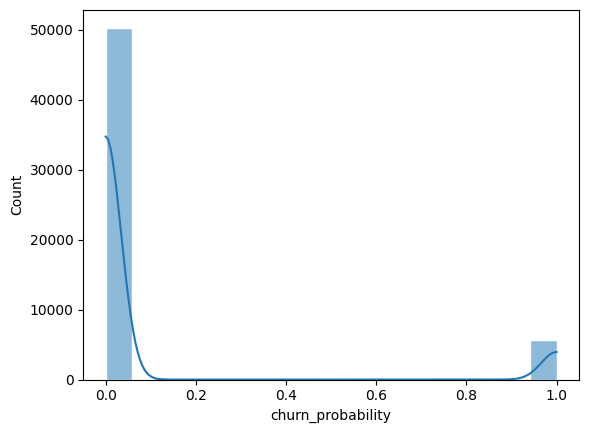

In [ ]:
#Distribution for the churn probability
sns.histplot(y_train, edgecolor='white', kde=True)

<i> There is a significant hint of class imbalance in the distribution of target variable.

## Multivariate Analysis

In [ ]:
cor = data.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.80) | (cor < -0.80)].sort_values()

loc_ic_mou_7      loc_ic_t2m_mou_7    0.802692
loc_ic_t2t_mou_8  loc_ic_t2t_mou_7    0.804753
loc_og_mou_7      loc_og_mou_6        0.813185
loc_og_t2m_mou_8  loc_og_t2m_mou_7    0.815128
loc_og_t2t_mou_8  loc_og_t2t_mou_7    0.815772
loc_og_mou_6      loc_og_t2m_mou_6    0.816215
loc_ic_mou_8      loc_ic_t2m_mou_8    0.816496
total_ic_mou_8    total_ic_mou_7      0.817588
loc_ic_mou_6      loc_ic_t2m_mou_6    0.823757
loc_ic_mou_8      loc_ic_mou_7        0.829162
std_og_t2m_mou_6  offnet_mou_6        0.831909
loc_og_mou_8      loc_og_mou_7        0.834978
total_og_mou_6    std_og_mou_6        0.840865
std_ic_mou_6      std_ic_t2m_mou_6    0.853522
std_ic_mou_8      std_ic_t2m_mou_8    0.855778
std_og_t2t_mou_6  onnet_mou_6         0.855785
std_og_t2m_mou_7  offnet_mou_7        0.855804
total_og_mou_7    std_og_mou_7        0.857320
std_og_t2m_mou_8  offnet_mou_8        0.857885
total_og_mou_8    std_og_mou_8        0.859475
std_ic_mou_7      std_ic_t2m_mou_7    0.859621
std_og_t2t_mo

In [ ]:
# drop highly correlated columns

data.drop(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
'total_og_mou_7','total_og_mou_8','total_og_mou_6',
'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_7',
'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
'sachet_2g_6','sachet_2g_7','sachet_2g_8',
'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8'],axis=1,inplace=True)

<Axes: >

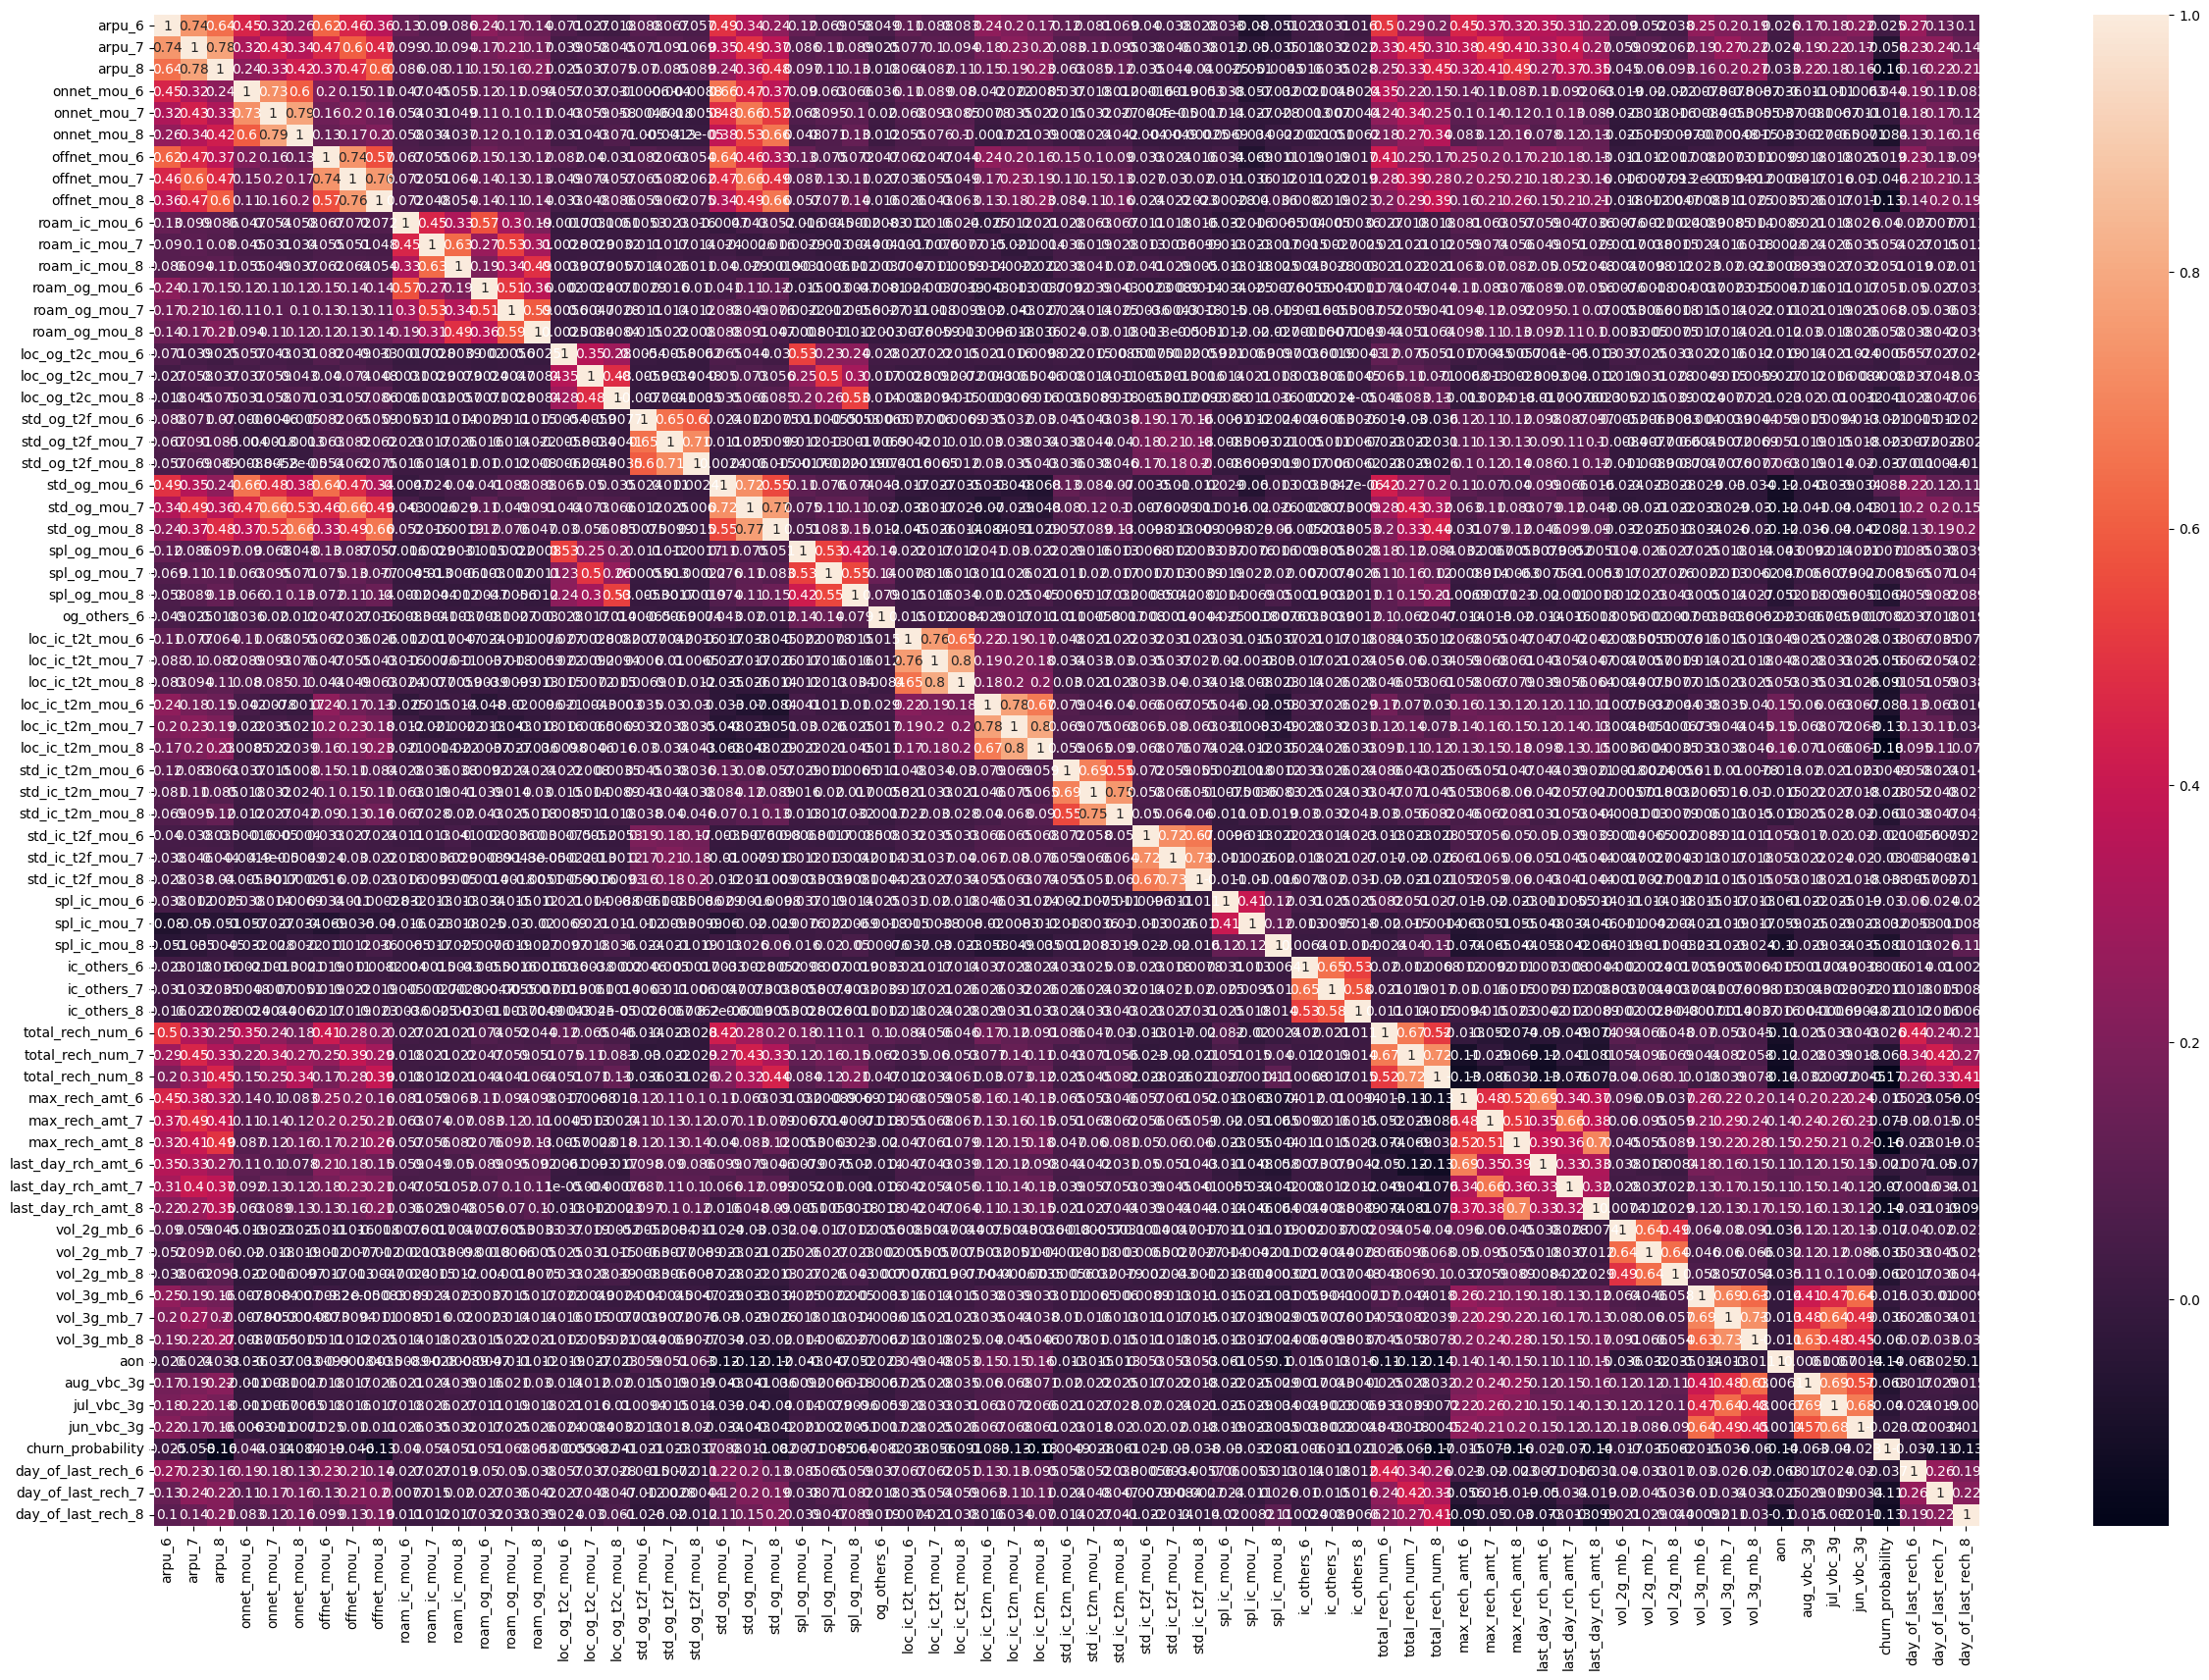

In [ ]:
# plotting the graph
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(data.corr(),annot = True)

# Feature Importance

In [ ]:
# fit data on random forest model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

# get features importances from X_train
feature_importances = pd.DataFrame({'col':X_train.columns, 'importance':rf.feature_importances_})

Feature importance list: 


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112],
 [Text(0, 0, 'total_ic_mou_8'),
  Text(1, 0, 'loc_ic_mou_8'),
  Text(2, 0, 'loc_ic_t2m_mou_8'),
  Text(3, 0, 'total_og_mou_8'),
  Text(4, 0, 'offnet_mou_8'),
  Text(5, 0, 'arpu_8'),
  Text(6, 0, 'loc_og_mou_8'),
  Text(7, 0, 'loc_ic_t2t_mou_8'),
  Text(8, 0, 'loc_og_t2m_mou_8'),
  Text(9, 0, 'max_rech_amt_8'),
  Text

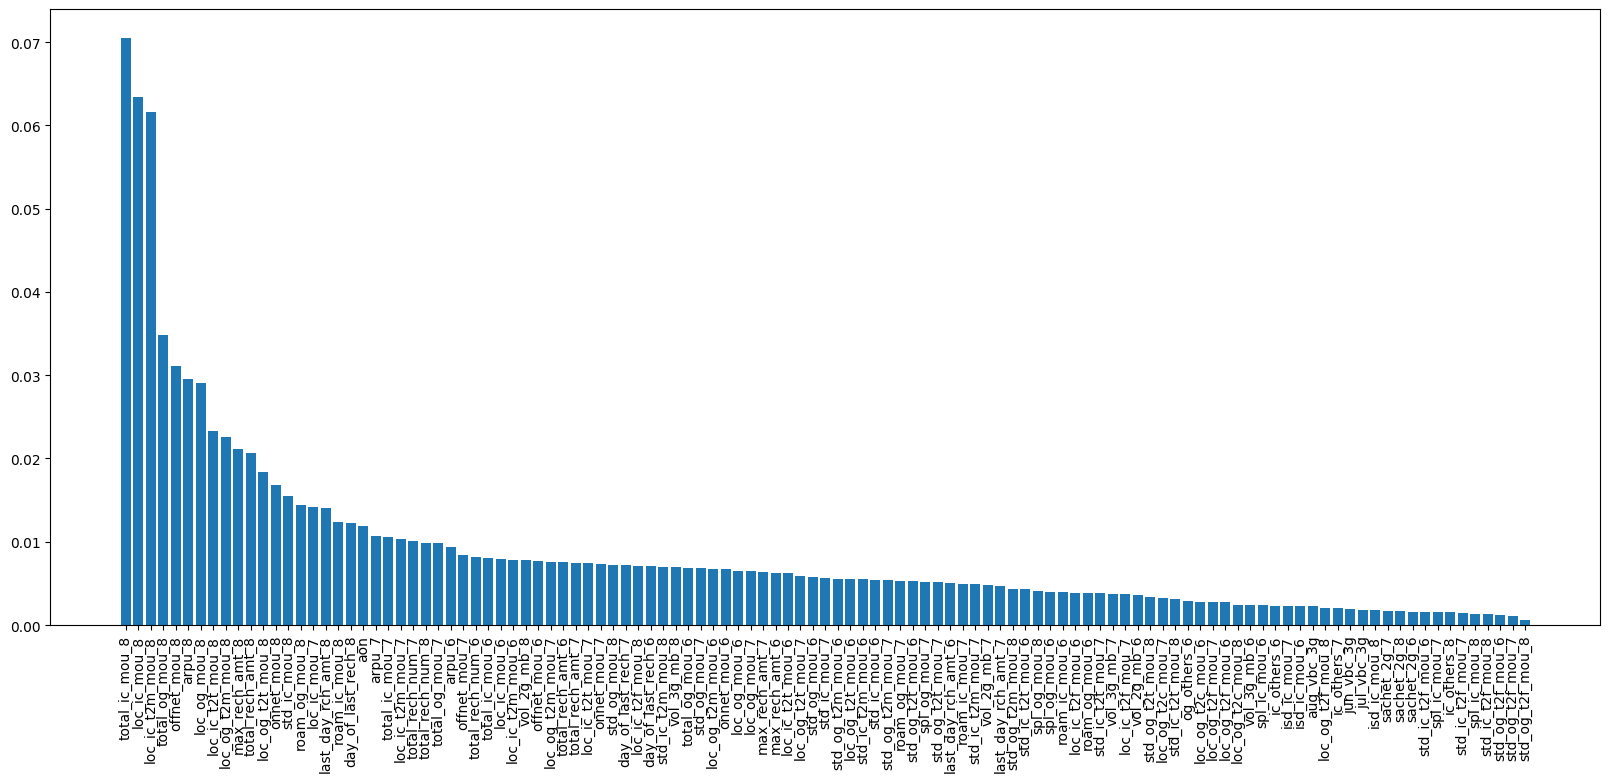

In [ ]:
# plot the features importances
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print('Feature importance list: ')
plt.figure(figsize=(20,8))
plt.bar(feature_importances['col'], feature_importances['importance'])
plt.xticks(rotation=90)

In [ ]:
print('Top ten predictors of churn: ')
feature_importances[:10]

Top ten predictors of churn: 


col  importance
75    total_ic_mou_8    0.070454
60      loc_ic_mou_8    0.063370
54  loc_ic_t2m_mou_8    0.061551
48    total_og_mou_8    0.034868
8       offnet_mou_8    0.031150
2             arpu_8    0.029538
29      loc_og_mou_8    0.029068
51  loc_ic_t2t_mou_8    0.023277
20  loc_og_t2m_mou_8    0.022579
93    max_rech_amt_8    0.021106

# Model Building

## Class imbalance

<Axes: xlabel='churn_probability', ylabel='Count'>

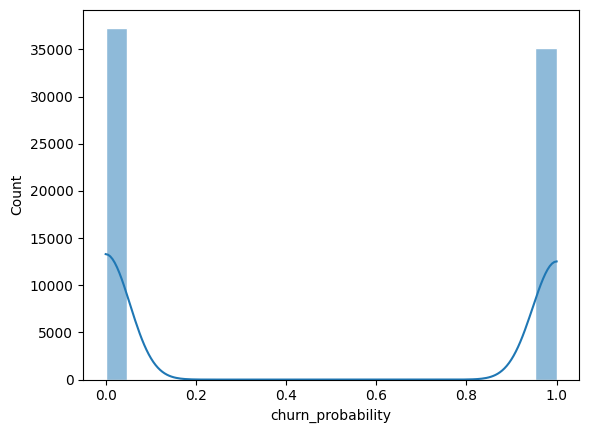

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import make_pipeline

# Create an ADASYN instance
adasyn = ADASYN(sampling_strategy=0.7, random_state=42)

# Create an ENN instance
enn = EditedNearestNeighbours()


# Make a pipeline of ADASYN and ENN
pipeline = make_pipeline(adasyn, enn)

# Fit and resample with X_train and y_train
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

#Distribution for the churn probability
sns.histplot(y_resampled, edgecolor='white', kde=True)

## PCA and Logistic Regression

### PCA

In [ ]:
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

Lets Visualise the distibutions of columns in PCA in 2d space

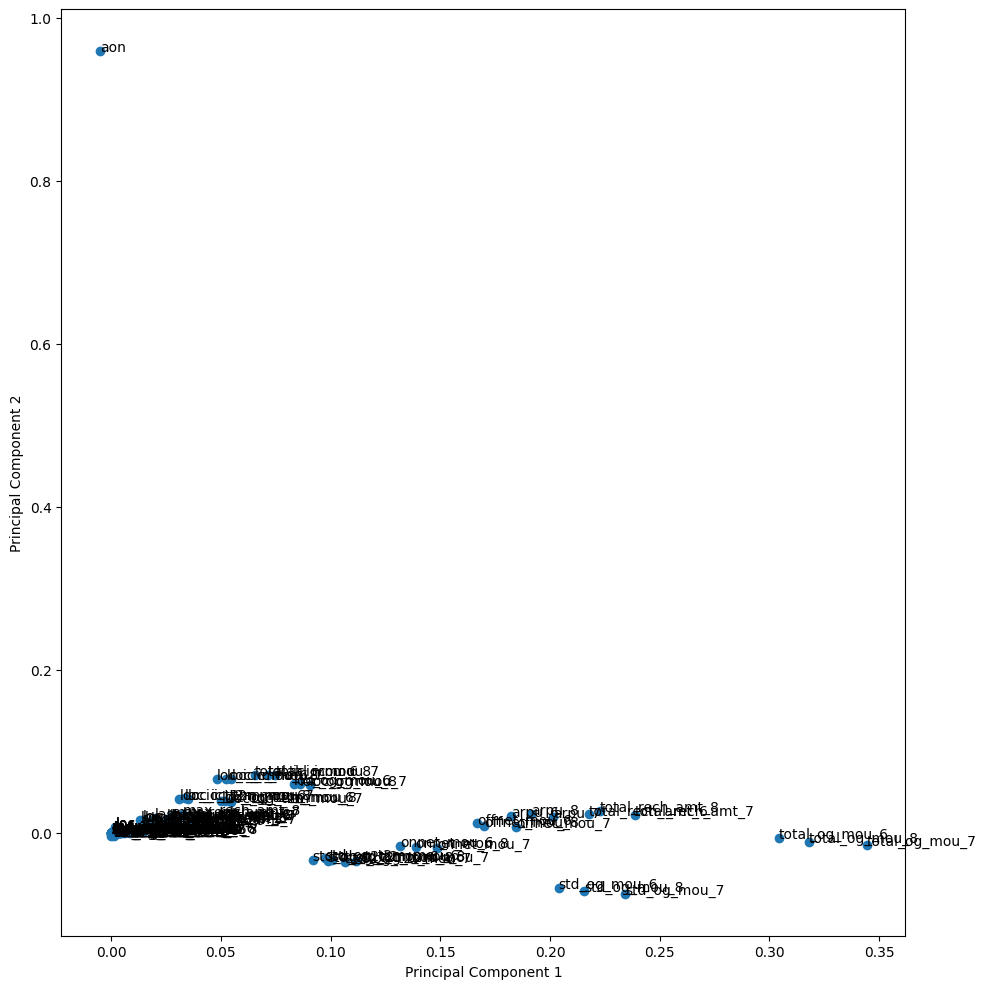

In [ ]:
pca.fit(X_train)
fig = plt.figure(figsize = (10,10))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

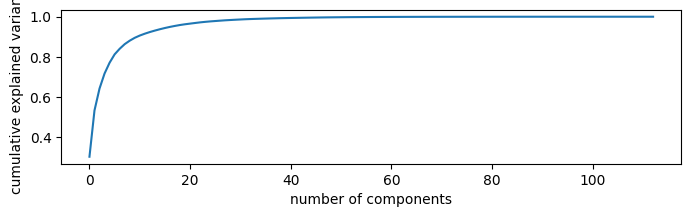

In [ ]:
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the visualisation we can see that around 30 components convey more than 95% data, So let's choose 30 as n_component

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [ ]:
Pca_DF=pca_final.fit_transform(X_train)

In [ ]:
Pca_DF.shape

(55999, 30)

In [ ]:
df_test_pca = pca_final.fit_transform(X_test)
df_test_pca.shape

(14000, 30)

### Logistic Regression

In [ ]:
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=30)),
         ("logistic", LogisticRegression(class_weight='balanced'))]

In [ ]:
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

0.7970856622439686

In [ ]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)



cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: \t', round(accuracy, 2))
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

accuracy: 	 0.79
Sensitivity: 	0.86
Specificity: 	0.78
AUC:    	 0.88


Sensitivity: 0.82 indicates that the model correctly identifies around 82% of the positive cases.

Specificity: 0.76 indicates that the model correctly identifies around 76% of the negative cases.

AUC: 0.85 indicates that the model's ability to distinguish between positive and negative cases is quite good, with an AUC score of 0.85 out of a maximum of 1.

Overall, these metrics suggest that the model has reasonably good performance in classifying the test data.

### Hyperparameter tuning - PCA and Logistic Regression

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


pca = PCA()
logistic_regression = LogisticRegression(class_weight={0:0.1, 1: 0.9})

pipeline_steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic_regression)
        ]

pca_logistic_pipeline = Pipeline(steps)

param_grid = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

cross_validation_folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid_search_model = GridSearchCV(estimator=pca_logistic_pipeline, cv=cross_validation_folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
# cross validation results
pd.DataFrame(grid_search_model.cv_results_).head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.535067      0.560752         0.000000        0.000000   
1       0.473845      0.047845         0.000000        0.000000   
2       4.513530      0.445715         0.093648        0.019618   
3       0.506028      0.061052         0.000000        0.000000   
4       3.838729      0.536472         0.000000        0.000000   
5       0.501422      0.075645         0.000000        0.000000   
6       4.724368      0.604383         0.134637        0.060927   
7       0.530122      0.069347         0.000000        0.000000   
8       3.467373      0.305686         0.000000        0.000000   
9       0.468958      0.085907         0.000000        0.000000   

  param_logistic__C param_logistic__penalty param_pca__n_components  \
0               0.1                      l1                      60   
1               0.1                      l1                      80   
2               0.1                      l2                      60   
3               0.1                      l2                      80   
4               0.5                      l1                      60   
5               0.5                      l1                      80   
6               0.5                      l2                      60   
7               0.5                      l2                      80   
8                 1                      l1                      60   
9                 1                      l1                      80   

                                              params  split0_test_score  \
0  {'logistic__C': 0.1, 'logistic__penalty': 'l1'...                NaN   
1  {'logistic__C': 0.1, 'logistic__penalty': 'l1'...                NaN   
2  {'logistic__C': 0.1, 'logistic__penalty': 'l2'...           0.887805   
3  {'logistic__C': 0.1, 'logistic__penalty': 'l2'...                NaN   
4  {'logistic__C': 0.5, 'logistic__penalty': 'l1'...                NaN   
5  {'logistic__C': 0.5, 'logistic__penalty': 'l1'...                NaN   
6  {'logistic__C': 0.5, 'logistic__penalty': 'l2'...           0.887909   
7  {'logistic__C': 0.5, 'logistic__penalty': 'l2'...                NaN   
8  {'logistic__C': 1, 'logistic__penalty': 'l1', ...                NaN   
9  {'logistic__C': 1, 'logistic__penalty': 'l1', ...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2           0.891831           0.877982           0.891717           0.896127   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   
5                NaN                NaN                NaN                NaN   
6           0.891911           0.878003           0.891876           0.896218   
7                NaN                NaN                NaN                NaN   
8                NaN                NaN                NaN                NaN   
9                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN                9  
1              NaN             NaN                9  
2         0.889092        0.006148                8  
3              NaN             NaN                9  
4              NaN             NaN                9  
5              NaN             NaN                9  
6         0.889184        0.006177                7  
7              NaN             NaN                9  
8              NaN             NaN                9  
9              NaN             NaN                9

In [ ]:
display("Best AUC: ", grid_search_model.best_score_)
display("Best hyperparameters: ", grid_search_model.best_params_)

'Best AUC: '

0.8892056856033962

'Best hyperparameters: '

{'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}

Best AUC Score: The AUC score is a measure of the area under the Receiver Operating Characteristic (ROC) curve, which represents the model's ability to distinguish between positive and negative classes. The best AUC score achieved is approximately 0.8591.

Best Hyperparameters: Hyperparameters are settings that are external to the model and are optimized to improve its performance. The best hyperparameters selected by the grid search are:

  -- Logistic Regression regularization parameter C set to 10.

  -- Logistic Regression penalty type penalty set to 'l2'.
  
  -- PCA component count n_components set to 60.


These hyperparameters are determined based on their ability to maximize the AUC score during cross-validation, indicating that they are optimal for the given dataset and task.

In [ ]:
y_pred = grid_search_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: \t', round(accuracy, 2))

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

y_pred_prob = grid_search_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[12510  3207]
 [  271  1512]]
     + Precision: 0.3204068658614113
Sensitivity: 	0.85
Specificity: 	0.8
AUC:    	 0.89


Above performance metrics indicate that the model performs reasonably well on the test data, with relatively high specificity and AUC score

##  PCA and Random Forest

In [ ]:
pca = PCA(n_components=50)
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=15, max_depth=30, n_jobs=-1, oob_score=True, random_state=42)

# create model pipline
pipe = Pipeline(steps = [('pca',pca),
                         ('model',rf)])

In [ ]:
# define model building function
from imblearn.metrics import specificity_score
def model_build_eval(X, y, data_name):

    print(f'\nPerform model building and evaluating on {data_name} set:')
    pipe.fit(X, y)

    #data_name set
    print(f"\n- {data_name} set:")

    # accuracy score on train data
    print("     + Accuracy:", pipe.score(X, y))

    ## because
    # make predictions for train data
    y_pred = pipe.predict(X)

    # Calculate the recall score
    recall = recall_score(y, y_pred)
    print("     + Recall/Sensitivity:", recall)

    # Calculate the precision score
    precision = precision_score(y, y_pred)
    print("     + Precision:", precision)

    # calcuate the specificity score
    specificity = specificity_score(y, y_pred, pos_label=0)
    print("     + specificity:", specificity)

    # test set
    print("\n- test set:")

    # accuracy score on test data
    print("     + Accuracy:", pipe.score(X_test, y_test))

    # make predictions for train data
    y_pred = pipe.predict(X_test)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    print("     + Recall/Sensitivity:", recall)

    # Calculate the precision score
    precision = precision_score(y_test, y_pred)
    print("     + Precision:", precision)

    # calcuate the specificity score
    specificity = specificity_score(y_test, y_pred, pos_label=0)
    print("     + specificity:", specificity)


In [ ]:
# run model building and evaluating
model_build_eval(X_resampled, y_resampled, 'resampled')


Perform model building and evaluating on resampled set:



- resampled set:
     + Accuracy: 0.9650735801651067
     + Recall/Sensitivity: 0.9558237504269612
     + Precision: 0.971699751143006
     + specificity: 0.9558237504269612

- test set:
     + Accuracy: 0.8451428571428572
     + Recall/Sensitivity: 0.8220815752461322
     + Precision: 0.37905317769131
     + specificity: 0.8220815752461322


# submission

## Unseen data transformation

### date data

#### Imputation

In [ ]:
# get the list of all date_of_last_rech columns
date_cols = [i for i in unseen.columns if re.search(r'^date_of_last_rech_\d$',i)]

# Obtain the dataframe where any value in the recharge related columns is equal to 0
any_equal_0_df = unseen[(unseen[rech_cols]==0).any(axis=1)][rech_cols]

# display all date_of_last_rech columns info
print('date_of_last_rech before imputation: ')
display(more_info(unseen[date_cols]))

# Impute missing values using random samples from the dataframe above
for i in date_cols:
    unseen.loc[unseen[i].isna(), i] = random.choices(any_equal_0_df[i].dropna().to_list(),k=unseen[i].isna().sum())

# display all date_of_last_rech columns info
print('date_of_last_rech after imputation: ')
display(more_info(unseen[date_cols]))

date_of_last_rech before imputation: 


% zero values  % missing values data type  uniques
date_of_last_rech_6            NaN          1.686667    object       30
date_of_last_rech_7            NaN          1.776667    object       31
date_of_last_rech_8            NaN          3.870000    object       31

date_of_last_rech after imputation: 


% zero values  % missing values data type  uniques
date_of_last_rech_6            NaN               NaN    object       30
date_of_last_rech_7            NaN               NaN    object       31
date_of_last_rech_8            NaN               NaN    object       31

####  Transform date to days

In [ ]:
# change object columns to datetime
unseen[date_cols] = unseen[date_cols].apply(pd.to_datetime)

# initialize temporal date lists
temp_date_cols = []

# define `day_of_last_rech` variables to replace date_of_last_rech variable
for i in date_cols:
    temp_date_cols.append(i.replace('date', 'day'))#, i.replace('date_of', 'days_from_baseline')])
    unseen[i.replace('date', 'day')] = unseen[i].dt.day
    unseen.drop(columns=i, inplace=True)

# assign date_cols to new date data
date_cols = temp_date_cols

print('Preview day_of_last_rech data table: ')
display(unseen[date_cols].head())

Preview day_of_last_rech data table: 


day_of_last_rech_6  day_of_last_rech_7  day_of_last_rech_8
0                  21                  26                  24
1                  19                  16                  24
2                  29                  27                  28
3                  25                  30                  24
4                  29                  29                  30

### Remaining Imputation

In [ ]:
print('Null values exist:', unseen.isna().any().any())
unseen.fillna(0, inplace=True)
print('Null values exist:', unseen.isna().any().any())

Null values exist: True
Null values exist: False


### Handling outliers

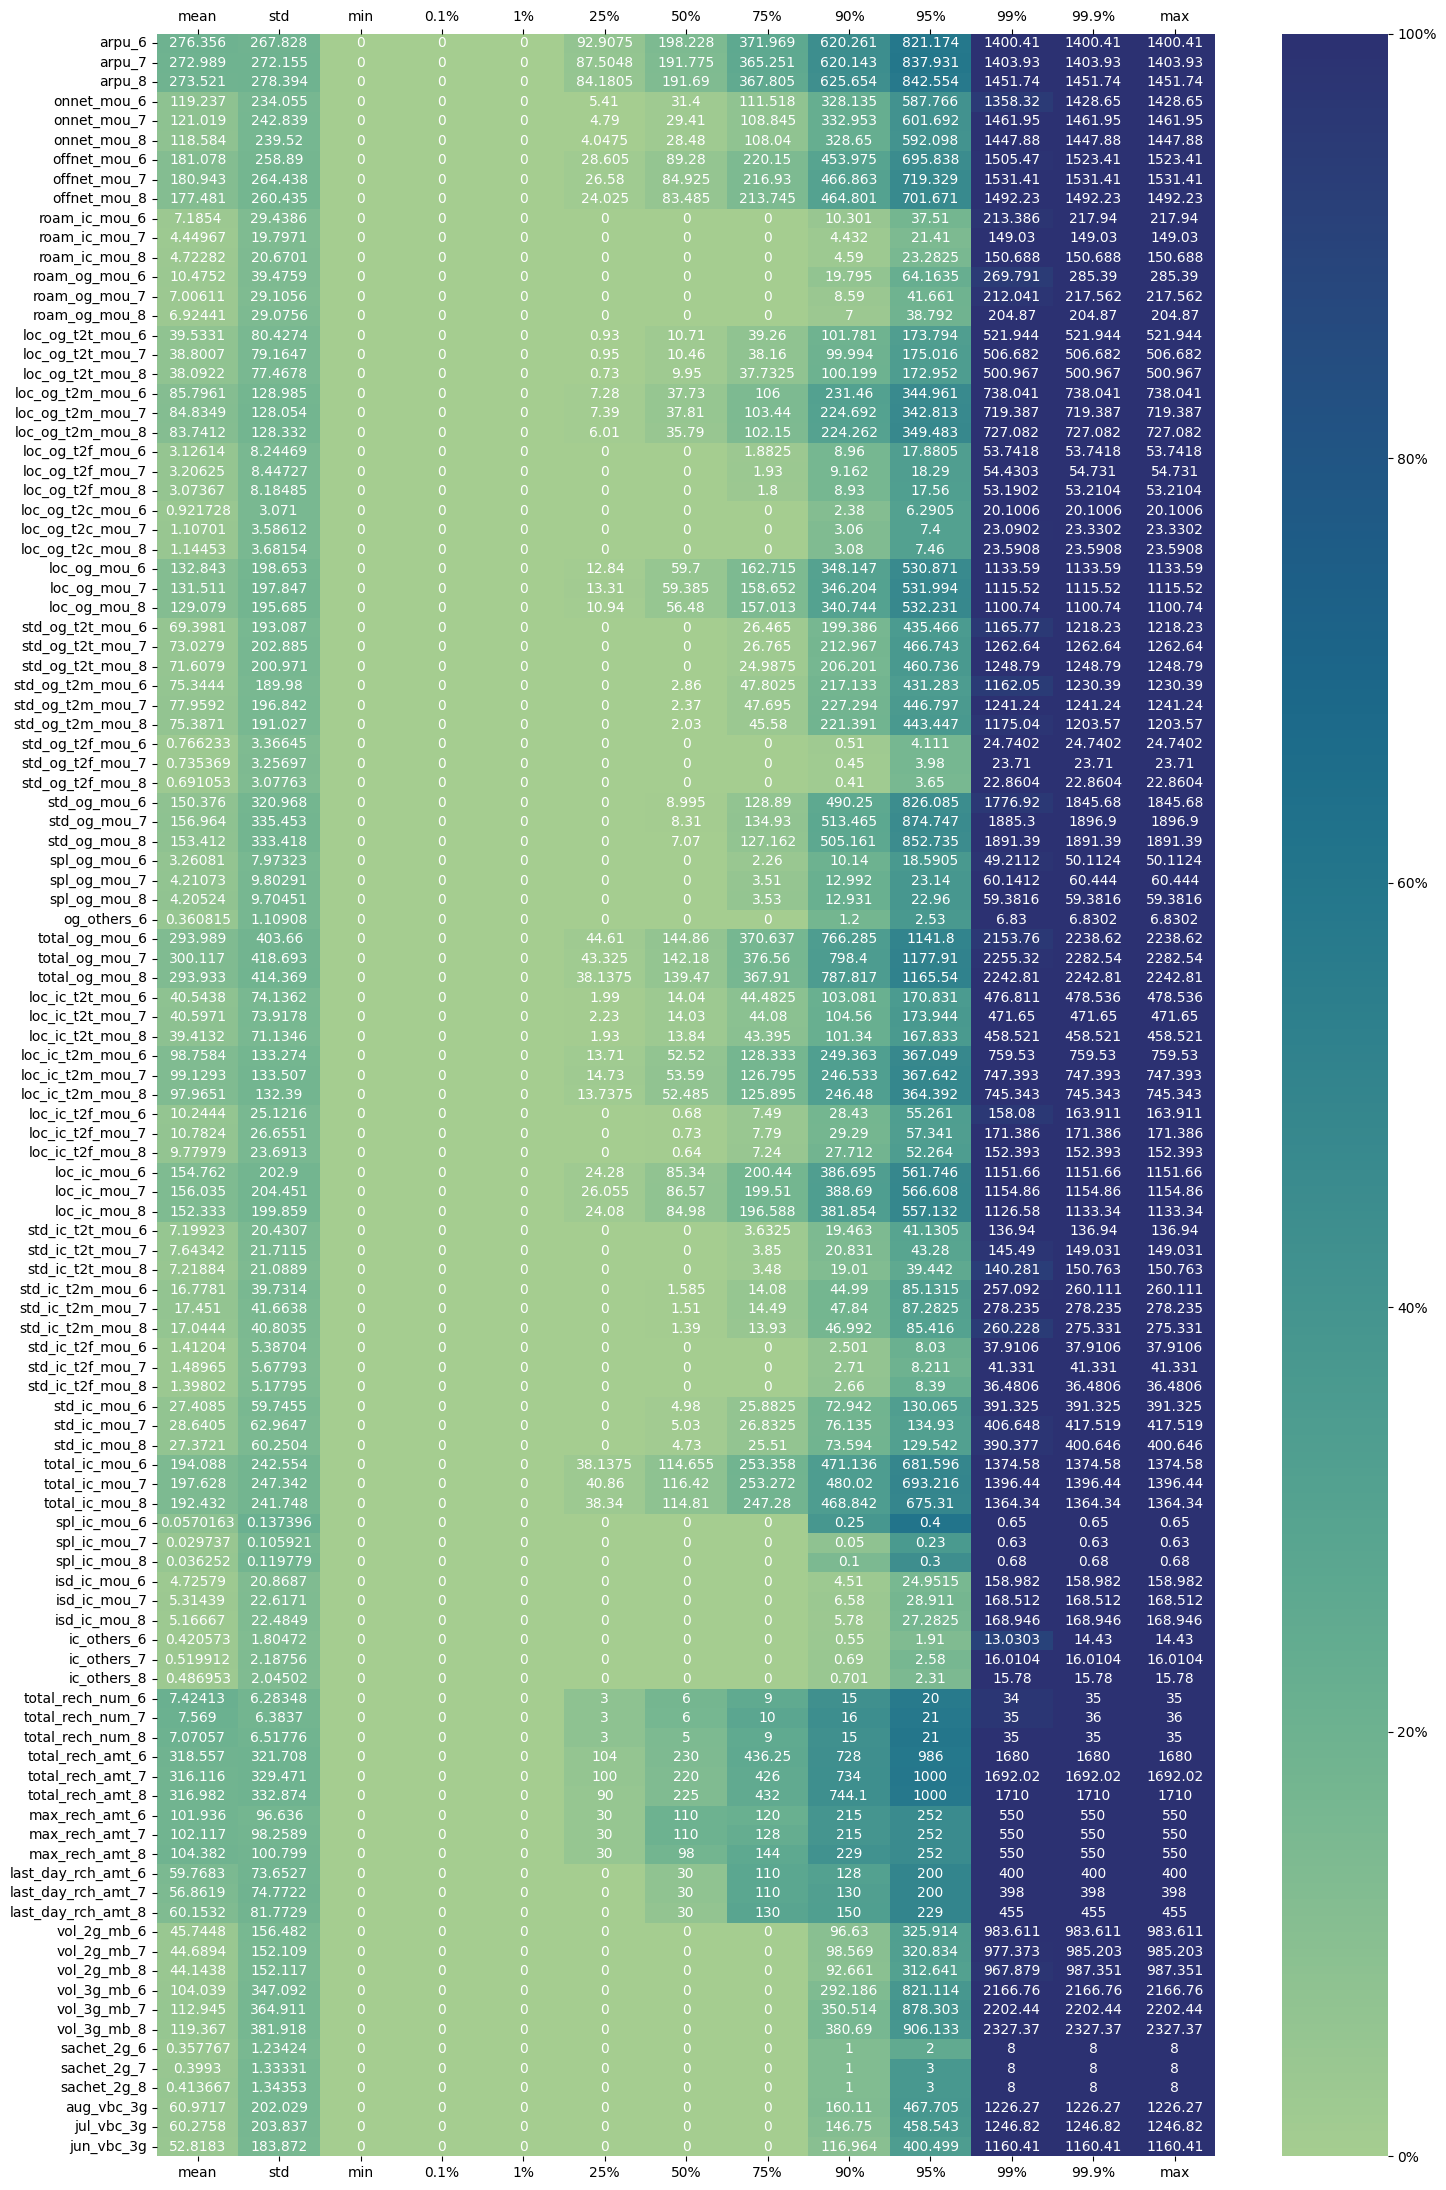

In [ ]:
# cap the outliers
for i in unseen.columns[unseen.columns.isin(list(capped_down_outliers.keys()))]:
    unseen[i] = unseen[i].clip(capped_down_outliers[i], capped_up_outliers[i])

# display the univariate heatmap after capping
univariate_heatmap(unseen.loc[:,unseen.columns.isin(list(capped_down_outliers.keys()))], [.001, .01, .25, .75, .9, .95, .99, .999], ['count'])

## Submit data

In [ ]:
# initialize submission data
submission_data = unseen.set_index('id')[X_train.columns]
submission_data.shape

# generate predictions
unseen['churn_probability'] = pipe.predict(submission_data)

# generate output data
output = unseen[['id','churn_probability']]
output.head()

# output to csv file
output.to_csv('Khang_Yasavi.csv',index=False)

# Recommendations